In [106]:
import math
import csv
import random
import string
from numpy import array, cov, corrcoef
import os
import numpy as np
import stats as sts
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from sklearn import preprocessing
import pandas as pd
import numpy as np
import os
import tarfile
from keras.optimizers import adam, rmsprop, adadelta
import csv
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.tree import  DecisionTreeRegressor
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras import optimizers

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
#生成01序列50%
a=[]
b=[]
while True:
    a = random.sample(range(0, 8000),4000)
    if a not in b:
        b.append(a)
    if len(b)==5000:
        break
    print(len(b))
for num in range(0,5000):
    filename = "1_26_8000"+str(num)+".csv"
    print('file',num)
    with open("E:/ELEC3D_for_Chen/" + filename, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(0,8000):
            if i in b[num]:
                value=1
            else:
                value=0
            writer.writerow([value])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132


3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901


file 202
file 203
file 204
file 205
file 206
file 207
file 208
file 209
file 210
file 211
file 212
file 213
file 214
file 215
file 216
file 217
file 218
file 219
file 220
file 221
file 222
file 223
file 224
file 225
file 226
file 227
file 228
file 229
file 230
file 231
file 232
file 233
file 234
file 235
file 236
file 237
file 238
file 239
file 240
file 241
file 242
file 243
file 244
file 245
file 246
file 247
file 248
file 249
file 250
file 251
file 252
file 253
file 254
file 255
file 256
file 257
file 258
file 259
file 260
file 261
file 262
file 263
file 264
file 265
file 266
file 267
file 268
file 269
file 270
file 271
file 272
file 273
file 274
file 275
file 276
file 277
file 278
file 279
file 280
file 281
file 282
file 283
file 284
file 285
file 286
file 287
file 288
file 289
file 290
file 291
file 292
file 293
file 294
file 295
file 296
file 297
file 298
file 299
file 300
file 301
file 302
file 303
file 304
file 305
file 306
file 307
file 308
file 309
file 310
file 311
file 312
f

file 1102
file 1103
file 1104
file 1105
file 1106
file 1107
file 1108
file 1109
file 1110
file 1111
file 1112
file 1113
file 1114
file 1115
file 1116
file 1117
file 1118
file 1119
file 1120
file 1121
file 1122
file 1123
file 1124
file 1125
file 1126
file 1127
file 1128
file 1129
file 1130
file 1131
file 1132
file 1133
file 1134
file 1135
file 1136
file 1137
file 1138
file 1139
file 1140
file 1141
file 1142
file 1143
file 1144
file 1145
file 1146
file 1147
file 1148
file 1149
file 1150
file 1151
file 1152
file 1153
file 1154
file 1155
file 1156
file 1157
file 1158
file 1159
file 1160
file 1161
file 1162
file 1163
file 1164
file 1165
file 1166
file 1167
file 1168
file 1169
file 1170
file 1171
file 1172
file 1173
file 1174
file 1175
file 1176
file 1177
file 1178
file 1179
file 1180
file 1181
file 1182
file 1183
file 1184
file 1185
file 1186
file 1187
file 1188
file 1189
file 1190
file 1191
file 1192
file 1193
file 1194
file 1195
file 1196
file 1197
file 1198
file 1199
file 1200
file 1201


file 1922
file 1923
file 1924
file 1925
file 1926
file 1927
file 1928
file 1929
file 1930
file 1931
file 1932
file 1933
file 1934
file 1935
file 1936
file 1937
file 1938
file 1939
file 1940
file 1941
file 1942
file 1943
file 1944
file 1945
file 1946
file 1947
file 1948
file 1949
file 1950
file 1951
file 1952
file 1953
file 1954
file 1955
file 1956
file 1957
file 1958
file 1959
file 1960
file 1961
file 1962
file 1963
file 1964
file 1965
file 1966
file 1967
file 1968
file 1969
file 1970
file 1971
file 1972
file 1973
file 1974
file 1975
file 1976
file 1977
file 1978
file 1979
file 1980
file 1981
file 1982
file 1983
file 1984
file 1985
file 1986
file 1987
file 1988
file 1989
file 1990
file 1991
file 1992
file 1993
file 1994
file 1995
file 1996
file 1997
file 1998
file 1999
file 2000
file 2001
file 2002
file 2003
file 2004
file 2005
file 2006
file 2007
file 2008
file 2009
file 2010
file 2011
file 2012
file 2013
file 2014
file 2015
file 2016
file 2017
file 2018
file 2019
file 2020
file 2021


file 2742
file 2743
file 2744
file 2745
file 2746
file 2747
file 2748
file 2749
file 2750
file 2751
file 2752
file 2753
file 2754
file 2755
file 2756
file 2757
file 2758
file 2759
file 2760
file 2761
file 2762
file 2763
file 2764
file 2765
file 2766
file 2767
file 2768
file 2769
file 2770
file 2771
file 2772
file 2773
file 2774
file 2775
file 2776
file 2777
file 2778
file 2779
file 2780
file 2781
file 2782
file 2783
file 2784
file 2785
file 2786
file 2787
file 2788
file 2789
file 2790
file 2791
file 2792
file 2793
file 2794
file 2795
file 2796
file 2797
file 2798
file 2799
file 2800
file 2801
file 2802
file 2803
file 2804
file 2805
file 2806
file 2807
file 2808
file 2809
file 2810
file 2811
file 2812
file 2813
file 2814
file 2815
file 2816
file 2817
file 2818
file 2819
file 2820
file 2821
file 2822
file 2823
file 2824
file 2825
file 2826
file 2827
file 2828
file 2829
file 2830
file 2831
file 2832
file 2833
file 2834
file 2835
file 2836
file 2837
file 2838
file 2839
file 2840
file 2841


file 3562
file 3563
file 3564
file 3565
file 3566
file 3567
file 3568
file 3569
file 3570
file 3571
file 3572
file 3573
file 3574
file 3575
file 3576
file 3577
file 3578
file 3579
file 3580
file 3581
file 3582
file 3583
file 3584
file 3585
file 3586
file 3587
file 3588
file 3589
file 3590
file 3591
file 3592
file 3593
file 3594
file 3595
file 3596
file 3597
file 3598
file 3599
file 3600
file 3601
file 3602
file 3603
file 3604
file 3605
file 3606
file 3607
file 3608
file 3609
file 3610
file 3611
file 3612
file 3613
file 3614
file 3615
file 3616
file 3617
file 3618
file 3619
file 3620
file 3621
file 3622
file 3623
file 3624
file 3625
file 3626
file 3627
file 3628
file 3629
file 3630
file 3631
file 3632
file 3633
file 3634
file 3635
file 3636
file 3637
file 3638
file 3639
file 3640
file 3641
file 3642
file 3643
file 3644
file 3645
file 3646
file 3647
file 3648
file 3649
file 3650
file 3651
file 3652
file 3653
file 3654
file 3655
file 3656
file 3657
file 3658
file 3659
file 3660
file 3661


file 4382
file 4383
file 4384
file 4385
file 4386
file 4387
file 4388
file 4389
file 4390
file 4391
file 4392
file 4393
file 4394
file 4395
file 4396
file 4397
file 4398
file 4399
file 4400
file 4401
file 4402
file 4403
file 4404
file 4405
file 4406
file 4407
file 4408
file 4409
file 4410
file 4411
file 4412
file 4413
file 4414
file 4415
file 4416
file 4417
file 4418
file 4419
file 4420
file 4421
file 4422
file 4423
file 4424
file 4425
file 4426
file 4427
file 4428
file 4429
file 4430
file 4431
file 4432
file 4433
file 4434
file 4435
file 4436
file 4437
file 4438
file 4439
file 4440
file 4441
file 4442
file 4443
file 4444
file 4445
file 4446
file 4447
file 4448
file 4449
file 4450
file 4451
file 4452
file 4453
file 4454
file 4455
file 4456
file 4457
file 4458
file 4459
file 4460
file 4461
file 4462
file 4463
file 4464
file 4465
file 4466
file 4467
file 4468
file 4469
file 4470
file 4471
file 4472
file 4473
file 4474
file 4475
file 4476
file 4477
file 4478
file 4479
file 4480
file 4481


In [11]:
#数值计算出label
data=[]
for num in range(0,5000):
    print(num)
    f1=open('E:\ELEC3D_for_Chen\ec3d.pam', 'r')
    str1=f1.readline()
    with open("E:\ELEC3D_for_Chen\ec3d.pam", "r", encoding="utf-8") as f_R:
        lines = f_R.readlines()
    with open("E:\ELEC3D_for_Chen\ec3d.pam", "w", encoding="utf-8") as f_w:
        for line in lines:
            if str1 in line:
                line = line.replace(str1,"1_26_8000"+str(num)+".csv"+"\n")
            f_w.write(line)
    os.system('E: && cd ELEC3D_for_Chen && ELEC3D')
    with open("E:\ELEC3D_for_Chen\outputfile.out", "r", encoding="utf-8") as f_O:
        lines = f_O.readlines()
        for line in lines:
            if 'Current in x direction =' in line:
                value1=float(line.split('=')[1].strip())
                print(value1)
    data.append([value1])
    #print(max(data),min(data))
with open("E:/ELEC3D_for_Chen/1_26_label.csv","w",newline='') as f3:
    writer = csv.writer(f3)
    for row in data:
        writer.writerow(row)

0
0.0774920657
1
0.078624405
2
0.0763455257
3
0.0762770548
4
0.0768067315
5
0.0754665509
6
0.0762414709
7
0.0768636987
8
0.0768682137
9
0.076434359
10
0.0777237639
11
0.0762865171
12
0.0787922814
13
0.0774217993
14
0.0759842619
15
0.0778164417
16
0.0784301609
17
0.0760539919
18
0.0770939067
19
0.0765636414
20
0.0786834061
21
0.0769150481
22
0.0758964568
23
0.0772895813
24
0.0756984204
25
0.0773095489
26
0.0785364509
27
0.0770053491
28
0.0769361034
29
0.0764856413
30
0.0768134892
31
0.0752371922
32
0.0764249116
33
0.0768884867
34
0.075550124
35
0.0772819594
36
0.0763266683
37
0.0765481517
38
0.0752074718
39
0.0773864388
40
0.0780870318
41
0.0755620003
42
0.0755573884
43
0.0756463557
44
0.0782160535
45
0.0765905827
46
0.0758477896
47
0.0785339251
48
0.0775363073
49
0.0763305351
50
0.0741458237
51
0.0752387568
52
0.074974291
53
0.0750787854
54
0.0761421025
55
0.0761926472
56
0.0757049099
57
0.0762106925
58
0.0746953487
59
0.0767913908
60
0.0763664991
61
0.0774862841
62
0.075967297
63
0.07

0.0755916238
495
0.0781404004
496
0.0774782225
497
0.07813216
498
0.0767745674
499
0.075997442
500
0.0772966743
501
0.0766851008
502
0.0766616762
503
0.0757471025
504
0.0769916922
505
0.0769543126
506
0.0758544952
507
0.075614661
508
0.0758174583
509
0.0768137723
510
0.075513199
511
0.0769349486
512
0.0775911957
513
0.0768904164
514
0.0764654875
515
0.0775415227
516
0.0767595768
517
0.0767184123
518
0.0770822093
519
0.0768103451
520
0.0750238374
521
0.0773026943
522
0.0771240816
523
0.076851882
524
0.0767237246
525
0.0781325996
526
0.0772896037
527
0.0777027234
528
0.0766593367
529
0.0760363638
530
0.075990133
531
0.0769313648
532
0.0783933699
533
0.0768972933
534
0.0767103806
535
0.0774582773
536
0.0768294632
537
0.0771682262
538
0.0779349431
539
0.075653106
540
0.0770796388
541
0.076532945
542
0.0788745582
543
0.075534761
544
0.0781660378
545
0.0788651481
546
0.0748163909
547
0.0765402392
548
0.0774137452
549
0.0757008344
550
0.0768571347
551
0.0770003945
552
0.0767048672
553
0.07511

0.0759133399
982
0.0771486908
983
0.0764025301
984
0.0751158819
985
0.0763442144
986
0.0770065784
987
0.0775972679
988
0.0776463076
989
0.0769447014
990
0.077320531
991
0.0765224323
992
0.0757195204
993
0.0770036206
994
0.0760393739
995
0.076413773
996
0.0753209144
997
0.0759326294
998
0.0759589225
999
0.0754601955
1000
0.0762424245
1001
0.077032879
1002
0.0778233707
1003
0.07918033
1004
0.0775496513
1005
0.0763162896
1006
0.0769569278
1007
0.0775712654
1008
0.0770929828
1009
0.0757814869
1010
0.0763276443
1011
0.0759915113
1012
0.0763472021
1013
0.0771044791
1014
0.07501252
1015
0.0772611424
1016
0.078196995
1017
0.0769966468
1018
0.0769806653
1019
0.0770616382
1020
0.0769860074
1021
0.0769991726
1022
0.0763072968
1023
0.0782827213
1024
0.074958466
1025
0.0778013766
1026
0.0791858286
1027
0.0745240077
1028
0.0756019279
1029
0.0764552876
1030
0.0773595646
1031
0.076472044
1032
0.0785136446
1033
0.0781422481
1034
0.0771299675
1035
0.0762849152
1036
0.0759314522
1037
0.0770288035
1038
0.

0.0764159858
1442
0.0777754858
1443
0.0765655264
1444
0.0775408
1445
0.0760499388
1446
0.0769754499
1447
0.0764604136
1448
0.0763583556
1449
0.0765701905
1450
0.0780608431
1451
0.0776472539
1452
0.0782482028
1453
0.0785727203
1454
0.0783282518
1455
0.0765580684
1456
0.0779177845
1457
0.0780084133
1458
0.0757160187
1459
0.0780113041
1460
0.0769240111
1461
0.074831821
1462
0.0769901946
1463
0.0774379596
1464
0.0759557113
1465
0.0782411024
1466
0.0774384141
1467
0.0773919895
1468
0.0774333552
1469
0.0770921186
1470
0.0787579119
1471
0.0779765546
1472
0.0763962567
1473
0.0765620694
1474
0.0763482451
1475
0.0775179416
1476
0.0745012164
1477
0.0764510781
1478
0.0774172172
1479
0.0766312703
1480
0.0773990601
1481
0.0750870183
1482
0.0754547715
1483
0.077410467
1484
0.0764034539
1485
0.077254042
1486
0.0765940696
1487
0.0772843584
1488
0.0762311146
1489
0.0759582594
1490
0.0772345439
1491
0.076767154
1492
0.075385429
1493
0.0747716725
1494
0.0773567632
1495
0.0766986981
1496
0.075496085
1497
0

0.0756946728
1901
0.0765423402
1902
0.0773393214
1903
0.0772028863
1904
0.0760492012
1905
0.0761773139
1906
0.076754123
1907
0.0768657625
1908
0.0773365945
1909
0.077368021
1910
0.0752114728
1911
0.0767119527
1912
0.0789078549
1913
0.0777492896
1914
0.0778112635
1915
0.0771622062
1916
0.0767762884
1917
0.0769250169
1918
0.0778275281
1919
0.07562159
1920
0.0763864368
1921
0.0783007592
1922
0.0773415267
1923
0.0755226836
1924
0.0768677369
1925
0.0781232044
1926
0.0771018639
1927
0.0776214823
1928
0.0775932744
1929
0.0761957541
1930
0.0770266727
1931
0.0758608207
1932
0.0772837549
1933
0.0778715014
1934
0.0754985958
1935
0.0779133663
1936
0.0790565163
1937
0.0770511478
1938
0.0754818842
1939
0.0771986321
1940
0.0770910084
1941
0.0755597129
1942
0.0764607564
1943
0.0765344128
1944
0.0778943077
1945
0.0772416368
1946
0.0768814161
1947
0.0774967596
1948
0.0771384537
1949
0.0765560567
1950
0.0755006969
1951
0.0770681426
1952
0.0767093897
1953
0.0754110515
1954
0.0760117918
1955
0.0763990432
1

0.0770071447
2359
0.0756108761
2360
0.0761757717
2361
0.0770941824
2362
0.0759817138
2363
0.0776582062
2364
0.0769396424
2365
0.0754414871
2366
0.075287737
2367
0.0774769038
2368
0.0770310163
2369
0.0764149874
2370
0.0794712007
2371
0.0772518292
2372
0.0776969865
2373
0.0774400532
2374
0.0756175593
2375
0.0761280805
2376
0.0757910311
2377
0.0767981634
2378
0.0757654756
2379
0.0751267374
2380
0.076784946
2381
0.0772829279
2382
0.0758572221
2383
0.0778947249
2384
0.0751573741
2385
0.0788624734
2386
0.0765806884
2387
0.0772794858
2388
0.0759035051
2389
0.0775680766
2390
0.0770652369
2391
0.0745361224
2392
0.0770662799
2393
0.0758838281
2394
0.0777252391
2395
0.0772354454
2396
0.0780085847
2397
0.0767547637
2398
0.0767454952
2399
0.0755634829
2400
0.0774362609
2401
0.0755502805
2402
0.076186724
2403
0.0793077499
2404
0.0780289546
2405
0.076211676
2406
0.0760841817
2407
0.0770090669
2408
0.07528615
2409
0.0775468275
2410
0.0780844018
2411
0.0765773132
2412
0.0766119808
2413
0.0780466422
241

0.0768666491
2820
0.0758622065
2821
0.0769278109
2822
0.0745449215
2823
0.0759064332
2824
0.0778314322
2825
0.0763743073
2826
0.0749613419
2827
0.0770104527
2828
0.0765566081
2829
0.0776816607
2830
0.0772014037
2831
0.0753471181
2832
0.076686725
2833
0.0770010799
2834
0.0781364888
2835
0.077480793
2836
0.0778759122
2837
0.0764288604
2838
0.0764348209
2839
0.0779117867
2840
0.0755484328
2841
0.0769301876
2842
0.0768160746
2843
0.0764880627
2844
0.0758282542
2845
0.0764173642
2846
0.077336669
2847
0.0768575892
2848
0.0759904087
2849
0.0775377601
2850
0.0754539073
2851
0.0781052485
2852
0.0769648626
2853
0.0772619173
2854
0.0771749765
2855
0.0756728351
2856
0.0765281245
2857
0.0767434388
2858
0.0777012631
2859
0.0770999193
2860
0.0760322511
2861
0.0760957822
2862
0.078747578
2863
0.0758353323
2864
0.074724108
2865
0.0761853382
2866
0.0788264796
2867
0.077655077
2868
0.076973781
2869
0.0765415952
2870
0.0785419717
2871
0.0779858157
2872
0.0778166726
2873
0.0772603899
2874
0.0752326921
2875

0.0790368766
3280
0.0770714581
3281
0.0764133707
3282
0.0767840222
3283
0.0760665312
3284
0.0771375969
3285
0.0754515827
3286
0.0770428106
3287
0.0762729123
3288
0.0768096447
3289
0.0775782913
3290
0.0774700269
3291
0.0766911209
3292
0.0774275512
3293
0.0773024634
3294
0.075658001
3295
0.0764132887
3296
0.0768459812
3297
0.0765134171
3298
0.0778652355
3299
0.0779777467
3300
0.0766675174
3301
0.0765703917
3302
0.0769641995
3303
0.0756245926
3304
0.0790582597
3305
0.0759362504
3306
0.0762935728
3307
0.0752574652
3308
0.0762558207
3309
0.0787295029
3310
0.0759935379
3311
0.0747122169
3312
0.0772882402
3313
0.076671958
3314
0.0767282769
3315
0.0767867863
3316
0.0772300214
3317
0.0766716078
3318
0.0762901604
3319
0.076297693
3320
0.076731883
3321
0.0776577145
3322
0.0766981021
3323
0.0781423673
3324
0.0759211257
3325
0.0773037076
3326
0.0782388225
3327
0.0778737813
3328
0.0765525028
3329
0.0765495077
3330
0.0770422071
3331
0.0780759305
3332
0.0759870335
3333
0.0741414651
3334
0.0763432682
3

0.0765115842
3739
0.0769521743
3740
0.0762995109
3741
0.0781584457
3742
0.0762487575
3743
0.0769948214
3744
0.0768340379
3745
0.0764859542
3746
0.0759787783
3747
0.0782585591
3748
0.077743046
3749
0.0776239038
3750
0.0771194324
3751
0.0774710029
3752
0.0754877999
3753
0.0773740932
3754
0.078399159
3755
0.0762003809
3756
0.0754438564
3757
0.0756537691
3758
0.077527754
3759
0.0772749484
3760
0.0759253204
3761
0.0772286654
3762
0.0771290809
3763
0.0775430351
3764
0.0754699633
3765
0.0764940232
3766
0.0763223022
3767
0.0754764453
3768
0.0772294849
3769
0.0766267627
3770
0.0776024684
3771
0.0772389621
3772
0.0768226013
3773
0.0776497349
3774
0.076215975
3775
0.0761640966
3776
0.0752786249
3777
0.0767782256
3778
0.0764465779
3779
0.0765002817
3780
0.0777375475
3781
0.0762765482
3782
0.0767040178
3783
0.0774232447
3784
0.0749074966
3785
0.0766195878
3786
0.0774126276
3787
0.0761435106
3788
0.0763156489
3789
0.0763455406
3790
0.0766928494
3791
0.0769733414
3792
0.0764777437
3793
0.0771475658
3

0.0774220899
4199
0.0764522851
4200
0.0775084719
4201
0.0771069452
4202
0.0767619833
4203
0.077081725
4204
0.0768013522
4205
0.0771586299
4206
0.0767095536
4207
0.0751669109
4208
0.0780053884
4209
0.0780067518
4210
0.0773627236
4211
0.0781269893
4212
0.0780392587
4213
0.0756577775
4214
0.0772904679
4215
0.0756410733
4216
0.0776593909
4217
0.077220805
4218
0.0764241964
4219
0.0781151652
4220
0.0769660398
4221
0.0775577053
4222
0.0771532357
4223
0.0760860443
4224
0.0768566877
4225
0.0753588453
4226
0.0768061951
4227
0.0775710046
4228
0.0759367049
4229
0.0758637562
4230
0.0772364289
4231
0.078157112
4232
0.0779154897
4233
0.0764863417
4234
0.077505067
4235
0.077599518
4236
0.0754160658
4237
0.0764505565
4238
0.0757018402
4239
0.0763486698
4240
0.0776296929
4241
0.0765709504
4242
0.077519618
4243
0.0763842613
4244
0.0764145404
4245
0.0756495595
4246
0.0760169551
4247
0.0770568773
4248
0.0770033076
4249
0.0759505555
4250
0.0759554282
4251
0.07561744
4252
0.0764410272
4253
0.0764981359
4254


0.0765311345
4658
0.0783428699
4659
0.0763929412
4660
0.0755421147
4661
0.0778981522
4662
0.0773804337
4663
0.0762883425
4664
0.0772277638
4665
0.0785075873
4666
0.0750609562
4667
0.07542447
4668
0.0763930008
4669
0.0768111199
4670
0.0765497833
4671
0.0771104172
4672
0.0784107894
4673
0.0757503361
4674
0.0759673342
4675
0.077643618
4676
0.0766943544
4677
0.0765350088
4678
0.0760280564
4679
0.0763107613
4680
0.0761280432
4681
0.0768590719
4682
0.0774126947
4683
0.0781626254
4684
0.0757474303
4685
0.0773426592
4686
0.0762436911
4687
0.0759617165
4688
0.0769831836
4689
0.0772797614
4690
0.0764446035
4691
0.078667894
4692
0.0761241168
4693
0.076092951
4694
0.0782438964
4695
0.076865159
4696
0.0753078461
4697
0.0765275508
4698
0.0772518143
4699
0.0756950304
4700
0.0774239749
4701
0.077674754
4702
0.0764744282
4703
0.076146692
4704
0.0779211298
4705
0.0766384751
4706
0.0766238496
4707
0.0765180811
4708
0.0770721138
4709
0.0780317932
4710
0.0766271353
4711
0.0776703358
4712
0.0765632391
4713


In [12]:
datas=[]
for num1 in range(0,5000):
    print(num1)
    filename = "1_26_8000" + str(num1) + ".csv"
    with open("E:\ELEC3D_for_Chen/" + filename, "rt", encoding="utf-8") as csvfile:
        reader = csv.reader(csvfile)
        rows = [row[0] for row in reader]
        datas.append(rows)
with open('E:/ELEC3D_for_Chen/1_26_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for row in datas:
        writer.writerow(row)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102


3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784


In [23]:
#计算体积，表面积--------
data = np.loadtxt("E:/ELEC3D_for_Chen/1_26_data.csv",delimiter=",",skiprows=0)
#y_label = np.loadtxt("E:/ELEC3D_for_Chen/8000_label.csv",delimiter=",",skiprows=0)
row_num=5000
N=20
new_data=[]
for row in range(0,row_num):
    volume = 0
    surface = 0
    width_num=0
    mean_width=0
    x=0
    x_point=[]
    y_point=[]
    z_point=[]
    #计算1-体积
    for i in range(0,N*N*N):
        if data[row][i] == 1:
            volume=volume+1
            x = int(i % N)
            y = int(i / N % N)
            z = int(i / (N * N))
            x_point.append(x)
            y_point.append(y)
            z_point.append(z)
    #计算宽度个数和表面姐
    for y in range(0,N):
        for z in range(0,N):
            if data[row][x+y*N+z*N*N]==1:
                surface=surface+1
                width_num=width_num+1
    #print(width_num)
    x=N-1
    for y in range(0,N):
        for z in range(0,N):
            if data[row][x+y*N+z*N*N]==1:
                surface=surface+1
                if data[row][(x-1)+y*N+z*N*N]==0:
                    width_num=width_num+1
    for x in range(1,N-1):
        for y in range(0, N):
            for z in range(0, N):
                if data[row][x+y*N+z*N*N]==1:
                    if data[row][x-1+y*N+z*N*N]==0:
                        surface=surface+1
                        width_num=width_num+1
                    if data[row][x+1+y*N+z*N*N]==0:
                        surface=surface+1

    y = 0
    for x in range(0, N):
        for z in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                width_num = width_num + 1
                surface = surface + 1
    y = N-1
    for x in range(0, N):
        for z in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                surface = surface + 1
                if data[row][x+(y-1)*N+z*N*N]==0:
                    width_num=width_num+1
    for y in range(1, N - 1):
        for x in range(0, N):
            for z in range(0, N):
                if data[row][x + y * N + z * N * N] == 1:
                    if data[row][x + (y-1) * N + z * N * N] == 0:
                        width_num = width_num + 1
                        surface = surface + 1
                    if data[row][x + (y+1) * N + z * N * N] == 0:
                        surface = surface + 1

    z = 0
    for x in range(0, N):
        for y in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                width_num = width_num + 1
                surface = surface + 1
    z = N-1
    for x in range(0, N):
        for y in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                surface = surface + 1
                if data[row][x + y * N + (z-1) * N * N] == 0:
                    width_num = width_num + 1
    for z in range(1, N - 1):
        for x in range(0, N):
            for y in range(0, N):
                if data[row][x + y * N + z * N * N] == 1:
                    if data[row][x + y * N + (z-1) * N * N] == 0:
                        width_num = width_num + 1
                        surface = surface + 1
                    if data[row][x + y * N + (z+1) * N * N] == 0:
                        surface = surface + 1




    mean_width=volume*3/width_num
    Median=(np.median(x_point)+np.median(y_point)+np.median(z_point))/3
    mean_v=(np.mean(x_point)+np.mean(y_point)+np.mean(z_point))/3
    standard_deviation=(np.std(x_point)+np.std(y_point)+np.std(z_point))/3
    Dispersion_coefficient=standard_deviation / mean_v
    Upper_quartile=(sts.quantile(x_point, p=0.25)+sts.quantile(y_point, p=0.25)+sts.quantile(z_point, p=0.25))/3
    Lower_Quantile=(sts.quantile(x_point, p=0.75)+sts.quantile(y_point, p=0.75)+sts.quantile(z_point, p=0.75))/3
    quartile_deviation=Lower_Quantile-Upper_quartile
    skewness=(sts.skewness(x_point)+sts.skewness(y_point)+sts.skewness(z_point))/3
    kurtosis=(sts.kurtosis(x_point)+sts.kurtosis(y_point)+sts.kurtosis(z_point))/3
    print('row',row)
    print('上四分位数', Upper_quartile)
    print('下四分位数', Lower_Quantile)
    print('四分位差', quartile_deviation)
    print('中位数:', Median)
    print('平均值:', mean_v)
    print('标准差:', standard_deviation)
    print('离散系数:',Dispersion_coefficient)
    print('偏度:', skewness)
    print('峰度:', kurtosis)
    print('平均宽度:',mean_width)
    print('表面积:',surface)
    print('体积:',volume)

    new_data.append([Upper_quartile,Lower_Quantile,quartile_deviation,Median,mean_v,standard_deviation,
                     Dispersion_coefficient,skewness,kurtosis,mean_width,surface,volume])

with open("E:/ELEC3D_for_Chen/S_1_26_data.csv","w",newline='') as f3:
    writer = csv.writer(f3)
    for row in new_data:
        writer.writerow(row)

row 0
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.0
平均值: 9.44225
标准差: 5.7935665704766
离散系数: 0.613579027295041
偏度: 0.006492058002241392
峰度: -1.2164634755200836
平均宽度: 1.894537417113988
表面积: 12076
体积: 4000
row 1
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.543249999999999
标准差: 5.773960961304922
离散系数: 0.6050308816498491
偏度: -0.01003376703141356
峰度: -1.2091039988359935
平均宽度: 1.9135704034444267
表面积: 11949
体积: 4000
row 2
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.49725
标准差: 5.737328299344537
离散系数: 0.6041041669266933
偏度: 0.003604740710062663
峰度: -1.1972460912138965
平均宽度: 1.9074868860276586
表面积: 12005
体积: 4000
row 3
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.455166666666669
标准差: 5.744798499529779
离散系数: 0.6075829969007891
偏度: 0.007971444210018289
峰度: -1.1951008152184974
平均宽度: 1.8924459864374705
表面积: 12064
体积: 4000
row 4
上四分位数 4.

row 36
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.666666666666666
平均值: 9.513416666666666
标准差: 5.755102953727627
离散系数: 0.6049459574174326
偏度: -0.004602780649025879
峰度: -1.193774514120176
平均宽度: 1.9129603060736489
表面积: 11940
体积: 4000
row 37
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.5
平均值: 9.49125
标准差: 5.750248866702118
离散系数: 0.6058473717057413
偏度: -0.0023913387345340024
峰度: -1.200640721666466
平均宽度: 1.9252366436707846
表面积: 11862
体积: 4000
row 38
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.477916666666665
标准差: 5.762824413650183
离散系数: 0.6080264910871956
偏度: 0.010764625166250943
峰度: -1.2157316931144038
平均宽度: 1.9280205655526992
表面积: 11865
体积: 4000
row 39
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.506416666666667
标准差: 5.757612380743694
离散系数: 0.6056553781123656
偏度: -0.001928512458400126
峰度: -1.2033979546162743
平均宽度: 1.888871399338895
表面积: 12099
体积:

row 73
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.502083333333333
标准差: 5.794245237465785
离散系数: 0.6097868261310188
偏度: 0.008125808817378732
峰度: -1.216942541840204
平均宽度: 1.9126554032515142
表面积: 11974
体积: 4000
row 74
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.540083333333333
标准差: 5.771073381739204
离散系数: 0.6049290325981643
偏度: -0.010923313116845607
峰度: -1.2098669874529318
平均宽度: 1.9193857965451055
表面积: 11934
体积: 4000
row 75
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.509583333333333
标准差: 5.771641630165181
离散系数: 0.6069289713182506
偏度: -0.008113823740835406
峰度: -1.209029046709941
平均宽度: 1.9083969465648856
表面积: 12005
体积: 4000
row 76
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.515416666666667
标准差: 5.7750001648991836
离散系数: 0.6069098566255655
偏度: -0.006100536674752895
峰度: -1.2110046067417561
平均宽度: 1.8891687657430731
表面

row 110
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.52925
标准差: 5.769222551355301
离散系数: 0.605422520277598
偏度: -0.0037224851502683115
峰度: -1.2070726897359714
平均宽度: 1.8912529550827424
表面积: 12080
体积: 4000
row 111
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.510166666666668
标准差: 5.775493491771645
离散系数: 0.6072967692579846
偏度: 0.003682364738981137
峰度: -1.212890220337858
平均宽度: 1.8782282047268744
表面积: 12116
体积: 4000
row 112
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.539416666666666
标准差: 5.775212303487744
离散系数: 0.6054051841207353
偏度: -0.013904168703438404
峰度: -1.2145327885341242
平均宽度: 1.8978333069745374
表面积: 12043
体积: 4000
row 113
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.0
平均值: 9.46425
标准差: 5.760011037935737
离散系数: 0.608607236488442
偏度: 0.015162002051123233
峰度: -1.2058075780614719
平均宽度: 1.9083969465648856
表面积: 12012
体积: 4000
row 114
上四分位数 

row 149
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.445333333333332
标准差: 5.759131265743602
离散系数: 0.6097329826803645
偏度: 0.012145610233042205
峰度: -1.2041851618427801
平均宽度: 1.8948365703458077
表面积: 12114
体积: 4000
row 150
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.549666666666667
标准差: 5.742315240226603
离散系数: 0.6013105421019864
偏度: -0.006802140386854454
峰度: -1.199009186651329
平均宽度: 1.8984337921214998
表面积: 11985
体积: 4000
row 151
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.479916666666666
标准差: 5.76134563365316
离散系数: 0.6077422235061658
偏度: 0.0013747129267667293
峰度: -1.2036789475124106
平均宽度: 1.8918492826738136
表面积: 12022
体积: 4000
row 152
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.4955
标准差: 5.754021627297707
离散系数: 0.6059735271757892
偏度: -0.0030057444991125836
峰度: -1.2068116522631616
平均宽度: 1.9224607497596924
表面积: 11922
体积: 4000
row 

row 189
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.516
标准差: 5.758065525886292
离散系数: 0.6050930565244107
偏度: 0.005851036314245842
峰度: -1.2015736945201383
平均宽度: 1.9150973507819982
表面积: 11916
体积: 4000
row 190
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.458583333333335
标准差: 5.74354070447112
离散系数: 0.6072305441587749
偏度: 0.01620561961590669
峰度: -1.1943018624567534
平均宽度: 1.9246190858059342
表面积: 11883
体积: 4000
row 191
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.428666666666667
标准差: 5.74314532915416
离散系数: 0.6091153216242127
偏度: 0.01703530947515353
峰度: -1.1919569210204095
平均宽度: 1.8912529550827424
表面积: 12075
体积: 4000
row 192
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.833333333333334
平均值: 9.5295
标准差: 5.7352496275604965
离散系数: 0.6018416105315595
偏度: -0.012046267383152716
峰度: -1.1974449681773873
平均宽度: 1.919692849144137
表面积: 11927
体积: 4000
row 193
上四

row 226
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.489833333333335
标准差: 5.758006321730683
离散系数: 0.6067552631831274
偏度: 0.0016656766544888583
峰度: -1.2048586538175365
平均宽度: 1.9105238019423658
表面积: 11954
体积: 4000
row 227
上四分位数 4.0
下四分位数 15.0
四分位差 11.0
中位数: 9.666666666666666
平均值: 9.524666666666667
标准差: 5.775385868999535
离散系数: 0.6063609437600128
偏度: -0.008616445737726736
峰度: -1.2126568786923828
平均宽度: 1.9212295869356388
表面积: 11899
体积: 4000
row 228
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.492416666666665
标准差: 5.799868923048926
离散系数: 0.6110002464826056
偏度: -0.0011061897351536656
峰度: -1.2191508412252343
平均宽度: 1.8682858477347035
表面积: 12240
体积: 4000
row 229
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.441666666666665
标准差: 5.760923424955167
离散系数: 0.6101595860499737
偏度: 0.010970426577859136
峰度: -1.208733755281908
平均宽度: 1.91357040344442

row 261
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.515333333333333
标准差: 5.757372994040016
离散系数: 0.6050626701506358
偏度: -0.0006665967460053023
峰度: -1.19919646087341
平均宽度: 1.899335232668566
表面积: 12023
体积: 4000
row 262
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.52825
标准差: 5.7732460818366365
离散系数: 0.6059083338321976
偏度: -0.0032668187630064023
峰度: -1.220009421031247
平均宽度: 1.9050642959199873
表面积: 12026
体积: 4000
row 263
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.50375
标准差: 5.782512457386217
离散系数: 0.6084453460356404
偏度: 0.005477630069942196
峰度: -1.213974794073564
平均宽度: 1.9083969465648856
表面积: 11956
体积: 4000
row 264
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.482833333333334
标准差: 5.77518616180206
离散系数: 0.6090148333095305
偏度: 0.0040625567607827035
峰度: -1.2126420216611111
平均宽度: 1.9212295869356388
表面积: 119

row 298
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.516833333333333
标准差: 5.808798615319074
离散系数: 0.6103709513303524
偏度: 0.002702082442130349
峰度: -1.2212260675401927
平均宽度: 1.8912529550827424
表面积: 12061
体积: 4000
row 299
上四分位数 4.0
下四分位数 15.0
四分位差 11.0
中位数: 9.666666666666666
平均值: 9.495583333333334
标准差: 5.806190522816226
离散系数: 0.6114622260682133
偏度: -0.00750920666498667
峰度: -1.2273910282799259
平均宽度: 1.9077901430842608
表面积: 11992
体积: 4000
row 300
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.5
平均值: 9.50725
标准差: 5.782104552010687
离散系数: 0.6081784482379959
偏度: -0.0008101091662543204
峰度: -1.2062019811113174
平均宽度: 1.8924459864374705
表面积: 12085
体积: 4000
row 301
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.562
标准差: 5.786149537685173
离散系数: 0.6051191735709238
偏度: -0.014274648666914897
峰度: -1.2171124588000215
平均宽度: 1.9023462270133165
表面积: 12028
体积: 4000
row 302
上四分位数

row 334
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.51175
标准差: 5.771742427355101
离散系数: 0.6068013170399875
偏度: -0.0004495796745202045
峰度: -1.2081403162235809
平均宽度: 1.8867924528301887
表面积: 12114
体积: 4000
row 335
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.0
平均值: 9.45425
标准差: 5.748937805374262
离散系数: 0.6080797319062075
偏度: 0.008838415078526046
峰度: -1.196182542706218
平均宽度: 1.9147917663954046
表面积: 11960
体积: 4000
row 336
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.41625
标准差: 5.7601447103802
离散系数: 0.6117238508302351
偏度: 0.010190039827268035
峰度: -1.204311161908916
平均宽度: 1.9050642959199873
表面积: 12003
体积: 4000
row 337
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.497583333333333
标准差: 5.778843974540222
离散系数: 0.6084541479366038
偏度: 0.003086673477122414
峰度: -1.207091536467896
平均宽度: 1.9218449711723253
表面积: 11884
体积: 4000
row 338
上四分位数 

row 375
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.557666666666668
标准差: 5.772973109923935
离散系数: 0.6040149035598579
偏度: -0.019077686599623177
峰度: -1.2117272359998124
平均宽度: 1.8981335020563113
表面积: 12033
体积: 4000
row 376
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.45075
标准差: 5.788347793598781
离散系数: 0.6124749669178405
偏度: 0.005906683011231501
峰度: -1.2128484121790182
平均宽度: 1.9096117122851686
表面积: 11973
体积: 4000
row 377
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.333333333333334
平均值: 9.545
标准差: 5.746769611566635
离散系数: 0.6020712007927329
偏度: -3.103557047917938e-05
峰度: -1.2002339792830856
平均宽度: 1.8900614269963774
表面积: 12075
体积: 4000
row 378
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.483083333333333
标准差: 5.7831357643533075
离散系数: 0.6098370710320983
偏度: 0.007239213416423476
峰度: -1.2064340621940126
平均宽度: 1.8882769472856018
表面积: 12098
体积: 4000

row 416
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.50175
标准差: 5.730988016135836
离散系数: 0.6031507897109307
偏度: 0.0007662578160888972
峰度: -1.2036100712382585
平均宽度: 1.9218449711723253
表面积: 11936
体积: 4000
row 417
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.502249999999998
标准差: 5.768450196495974
离散系数: 0.6070615061165487
偏度: 0.0007593800295800148
峰度: -1.2035606766296523
平均宽度: 1.899335232668566
表面积: 12031
体积: 4000
row 418
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.446666666666665
标准差: 5.760790143714931
离散系数: 0.6098225275633308
偏度: 0.018284870450251952
峰度: -1.203680556750945
平均宽度: 1.9283303872730195
表面积: 11859
体积: 4000
row 419
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.5335
标准差: 5.759042446858152
离散系数: 0.6040848006354594
偏度: -0.003515948169568283
峰度: -1.206879466635111
平均宽度: 1.9062748212867355
表面积: 11972
体积: 4000
row 420
上四分位数 4.

row 451
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.463166666666666
标准差: 5.752657945702535
离散系数: 0.6078998868281444
偏度: -0.009070712662799294
峰度: -1.2001783087592772
平均宽度: 1.9215372297838271
表面积: 11918
体积: 4000
row 452
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.5135
标准差: 5.772625867887484
离散系数: 0.6067825582474887
偏度: -0.004387623123550017
峰度: -1.2065829899810148
平均宽度: 1.9147917663954046
表面积: 11944
体积: 4000
row 453
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.50075
标准差: 5.768387623103074
离散系数: 0.6071507642136751
偏度: 0.0008073771247222835
峰度: -1.210673274283595
平均宽度: 1.9169329073482428
表面积: 11880
体积: 4000
row 454
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.48325
标准差: 5.764743635137194
离散系数: 0.6078869201104257
偏度: 0.0006432224061314155
峰度: -1.2102529981125303
平均宽度: 1.9221528111484862
表

row 490
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.666666666666666
平均值: 9.491416666666666
标准差: 5.735507520877857
离散系数: 0.6042836093183692
偏度: 0.00450218170230495
峰度: -1.203577842492283
平均宽度: 1.9230769230769231
表面积: 11886
体积: 4000
row 491
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.0
平均值: 9.469499999999998
标准差: 5.762201423929965
离散系数: 0.60850112719045
偏度: 0.015179106416721823
峰度: -1.2093723429873093
平均宽度: 1.9011406844106464
表面积: 12015
体积: 4000
row 492
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.5
平均值: 9.516916666666667
标准差: 5.767072671510047
离散系数: 0.6059812094088646
偏度: 0.004135768079716195
峰度: -1.2091595265643502
平均宽度: 1.9184652278177459
表面积: 11889
体积: 4000
row 493
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.333333333333334
平均值: 9.503666666666666
标准差: 5.773785374374334
离散系数: 0.6075323953254185
偏度: 0.004759286506707454
峰度: -1.211522296773601
平均宽度: 1.9135704034444267
表面积: 11965
体积: 4000
r

row 531
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.333333333333334
平均值: 9.505
标准差: 5.788154863463965
离散系数: 0.6089589545990494
偏度: 0.002947438738938301
峰度: -1.2194294183704446
平均宽度: 1.889466225791214
表面积: 12135
体积: 4000
row 532
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.491916666666667
标准差: 5.752250447888173
离散系数: 0.6060156920771014
偏度: 0.015484924834796578
峰度: -1.2032094133332258
平均宽度: 1.8885741265344664
表面积: 12095
体积: 4000
row 533
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.485166666666666
标准差: 5.738319446487566
离散系数: 0.6049782410944351
偏度: 0.0044035192563541626
峰度: -1.1921285259011574
平均宽度: 1.896633475580844
表面积: 11999
体积: 4000
row 534
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.532916666666667
标准差: 5.781496130979511
离散系数: 0.606477149978182
偏度: -0.0029616692255728595
峰度: -1.2152042199935977
平均宽度: 1.8835347669125726
表面积: 12130
体积: 4000
row 535


row 569
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.4675
标准差: 5.772919903324464
离散系数: 0.6097618065301784
偏度: 0.010671152847657002
峰度: -1.209855788664835
平均宽度: 1.9129603060736489
表面积: 11977
体积: 4000
row 570
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.535083333333333
标准差: 5.799722513764359
离散系数: 0.6082508470051154
偏度: -0.005665226228082218
峰度: -1.2155431309505607
平均宽度: 1.8829436686019143
表面积: 12102
体积: 4000
row 571
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 10.0
平均值: 9.517916666666666
标准差: 5.760280156524442
离散系数: 0.6052038863397392
偏度: -0.0055509234153351865
峰度: -1.204837947525632
平均宽度: 1.9236934915036872
表面积: 11882
体积: 4000
row 572
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.166666666666666
平均值: 9.445916666666667
标准差: 5.7574789968724085
离散系数: 0.6095204097226218
偏度: 0.005726726121716874
峰度: -1.2023340715587618
平均宽度: 1.915403032721

row 608
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.5
平均值: 9.501583333333334
标准差: 5.775303407991465
离散系数: 0.6078253702970344
偏度: -0.009450176142404518
峰度: -1.2081375774849434
平均宽度: 1.909307875894988
表面积: 11984
体积: 4000
row 609
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.497333333333332
标准差: 5.77271358483258
离散系数: 0.607824679015083
偏度: -0.008559031922565196
峰度: -1.2122640506856597
平均宽度: 1.9099156453923285
表面积: 11953
体积: 4000
row 610
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.490916666666665
标准差: 5.770081258989655
离散系数: 0.6079582680622337
偏度: 0.0016063364920969759
峰度: -1.2105566979996374
平均宽度: 1.8975332068311195
表面积: 12044
体积: 4000
row 611
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.53975
标准差: 5.750147786891925
离散系数: 0.6027566536745643
偏度: -0.011151558300903258
峰度: -1.2057504910353647
平均宽度: 1.8826482585503608
表面积: 12132
体积: 4000
row

row 645
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.48325
标准差: 5.748358983772493
离散系数: 0.6061591736770088
偏度: 0.007127726371202895
峰度: -1.2082095441822396
平均宽度: 1.904157410345922
表面积: 12043
体积: 4000
row 646
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.524083333333332
标准差: 5.763616803712925
离散系数: 0.6051623659718356
偏度: -0.003287096020749418
峰度: -1.2102193691201932
平均宽度: 1.9172391755871545
表面积: 11938
体积: 4000
row 647
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 10.0
平均值: 9.532416666666665
标准差: 5.75272295365147
离散系数: 0.6034905055889784
偏度: -0.016719348941333343
峰度: -1.1941481301315884
平均宽度: 1.8844221105527639
表面积: 12159
体积: 4000
row 648
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.458250000000001
标准差: 5.73205673100367
离散系数: 0.6060377692494562
偏度: 0.013611956948454957
峰度: -1.1935128862001312
平均宽度: 1.91877198592900

row 688
上四分位数 5.0
下四分位数 14.0
四分位差 9.0
中位数: 9.0
平均值: 9.469916666666666
标准差: 5.738382498284449
离散系数: 0.6059591335669391
偏度: 0.003021287646389414
峰度: -1.200234239505082
平均宽度: 1.9209220425804385
表面积: 11902
体积: 4000
row 689
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.0
平均值: 9.45875
标准差: 5.767202341500397
离散系数: 0.609721405206861
偏度: 0.009007756457546525
峰度: -1.2179523592006583
平均宽度: 1.9172391755871545
表面积: 11954
体积: 4000
row 690
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 10.0
平均值: 9.538416666666667
标准差: 5.756384046975282
离散系数: 0.6034947149134062
偏度: -0.011839230445815639
峰度: -1.204037971303049
平均宽度: 1.8826482585503608
表面积: 12169
体积: 4000
row 691
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.0
平均值: 9.469083333333334
标准差: 5.746786233952875
离散系数: 0.6068999534224053
偏度: 0.0147295551791731
峰度: -1.1963172591172413
平均宽度: 1.931745009658725
表面积: 11831
体积: 4000
row 692
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.6666666

下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.333333333333334
平均值: 9.45975
标准差: 5.7477473217398325
离散系数: 0.6076003405734647
偏度: 0.014155034022848368
峰度: -1.2029996768166793
平均宽度: 1.9135704034444267
表面积: 11986
体积: 4000
row 725
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.473166666666666
标准差: 5.75599045226797
离散系数: 0.6076099634688827
偏度: 0.0055370566852878346
峰度: -1.2042348676827643
平均宽度: 1.932367149758454
表面积: 11837
体积: 4000
row 726
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.49675
标准差: 5.774081440896816
离散系数: 0.6080060484794078
偏度: -0.0016907071623658
峰度: -1.2114474287537034
平均宽度: 1.9126554032515142
表面积: 11943
体积: 4000
row 727
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.560916666666666
标准差: 5.753632940513396
离散系数: 0.601786747140361
偏度: -0.00473464961422361
峰度: -1.2018636322760115
平均宽度: 1.8933417481855475
表面积: 12064
体积: 4000
row 728
上四分位数 5.0
下四分位

row 761
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.333333333333334
平均值: 9.459249999999999
标准差: 5.772146288588426
离散系数: 0.6102118337699529
偏度: 0.003872461066101921
峰度: -1.2007186502256582
平均宽度: 1.9166267369429804
表面积: 11916
体积: 4000
row 762
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.833333333333334
平均值: 9.525333333333334
标准差: 5.78105600813515
离散系数: 0.6069137746502467
偏度: -0.0015442078467346923
峰度: -1.2117612582071537
平均宽度: 1.9166267369429804
表面积: 11902
体积: 4000
row 763
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.414583333333333
标准差: 5.775865264115114
离散系数: 0.6135019532585206
偏度: 0.019889321647766006
峰度: -1.2022376957897287
平均宽度: 1.8915510718789408
表面积: 12055
体积: 4000
row 764
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.432166666666667
标准差: 5.74267260615796
离散系数: 0.6088391786430788
偏度: 0.01621116424429022
峰度: -1.1941333859701704
平均宽度: 1.8942383583267561
表面积

row 800
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.166666666666666
平均值: 9.5005
标准差: 5.727105190701466
离散系数: 0.602821450523811
偏度: 0.002425202746150036
峰度: -1.188288360828354
平均宽度: 1.9080934965813325
表面积: 11968
体积: 4000
row 801
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.476583333333332
标准差: 5.784908224504023
离散系数: 0.6104423947981277
偏度: 0.005414348621689283
峰度: -1.2201152444239838
平均宽度: 1.9032513877874702
表面积: 12048
体积: 4000
row 802
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.333333333333334
平均值: 9.552333333333335
标准差: 5.817319346867027
离散系数: 0.6089945926161523
偏度: -0.01126033321048073
峰度: -1.2238685424529023
平均宽度: 1.901743264659271
表面积: 11983
体积: 4000
row 803
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.489249999999998
标准差: 5.774591945642402
离散系数: 0.608540395251722
偏度: -0.0016979590458309195
峰度: -1.2075677892806758
平均宽度: 1.910828025477707
表

row 841
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.515666666666666
标准差: 5.762670471310659
离散系数: 0.605598185936595
偏度: -0.00038476500362454036
峰度: -1.217544066031732
平均宽度: 1.9206145966709347
表面积: 11879
体积: 4000
row 842
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.547833333333335
标准差: 5.80075123880431
离散系数: 0.6075463444206514
偏度: -0.01621370678757596
峰度: -1.2113129183696307
平均宽度: 1.9065776930409915
表面积: 11984
体积: 4000
row 843
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.0
平均值: 9.402499999999998
标准差: 5.771796451717548
离散系数: 0.613857639108487
偏度: 0.020277802549587713
峰度: -1.2147180056021265
平均宽度: 1.895435160322224
表面积: 12054
体积: 4000
row 844
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.0
平均值: 9.484
标准差: 5.752757974175787
离散系数: 0.6065750710855954
偏度: 0.003195721779457442
峰度: -1.2087876322226954
平均宽度: 1.9090041361756285
表面积: 12015
体积: 4000
row 845
上四分位数 5.0
下四分位数 14.666666666

row 880
上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 10.0
平均值: 9.552750000000001
标准差: 5.763543969649817
离散系数: 0.6033387212739594
偏度: -0.017778635526036052
峰度: -1.204871403099699
平均宽度: 1.9193857965451055
表面积: 11890
体积: 4000
row 881
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.440249999999999
标准差: 5.747362791905489
离散系数: 0.608814680957124
偏度: 0.018212805322008276
峰度: -1.1991293926450337
平均宽度: 1.929570670525808
表面积: 11883
体积: 4000
row 882
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.496416666666667
标准差: 5.760016651266896
离散系数: 0.6065463272567964
偏度: 0.0015506434267086703
峰度: -1.2029390853013804
平均宽度: 1.8714909544603868
表面积: 12148
体积: 4000
row 883
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.666666666666666
平均值: 9.477666666666666
标准差: 5.8003995802085955
离散系数: 0.612007130469025
偏度: -0.006864106095485649
峰度: -1.220249880276998
平均宽度: 1.8972332015810276
表面积: 12069
体积: 4000
row 884
上四分位数 4.666666666666667
下四分位数

row 919
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.333333333333334
平均值: 9.490416666666667
标准差: 5.74196388851896
离散系数: 0.6050275862688459
偏度: -0.0034986320715067252
峰度: -1.193377538922343
平均宽度: 1.8859028760018859
表面积: 12117
体积: 4000
row 920
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.333333333333334
平均值: 9.511916666666666
标准差: 5.778238224791977
离散系数: 0.6074735962564829
偏度: -0.0023627267308411345
峰度: -1.221573586098543
平均宽度: 1.9102196752626552
表面积: 11964
体积: 4000
row 921
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.554
标准差: 5.789187950190836
离散系数: 0.6059438926303994
偏度: -0.011582989091879067
峰度: -1.209584603044034
平均宽度: 1.8921475875118259
表面积: 12091
体积: 4000
row 922
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.465833333333334
标准差: 5.7803105476898535
离散系数: 0.610649939011165
偏度: 0.0073467970388084855
峰度: -1.2082625395944888
平均宽度: 1.90445960958578

row 955
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.666666666666666
平均值: 9.49825
标准差: 5.780015743121152
离散系数: 0.6085348083195485
偏度: -0.010739103125339135
峰度: -1.2036785682875701
平均宽度: 1.8981335020563113
表面积: 12063
体积: 4000
row 956
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 10.0
平均值: 9.53125
标准差: 5.76059729154128
离散系数: 0.6043905355059703
偏度: -0.010435202402496997
峰度: -1.201557676715252
平均宽度: 1.9129603060736489
表面积: 11947
体积: 4000
row 957
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.487166666666665
标准差: 5.7596780875855345
离散系数: 0.6071020242347244
偏度: 0.004899436404720826
峰度: -1.209232829988245
平均宽度: 1.8942383583267561
表面积: 12091
体积: 4000
row 958
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.44675
标准差: 5.754602490706399
离散系数: 0.6091621447276999
偏度: 0.009571067726818908
峰度: -1.2051373286152922
平均宽度: 1.8984337921214998
表面积: 12042
体积: 4000
row 959
上四分位数 4.0
下四分位数 14.0
四分位差 10.0


row 995
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.51525
标准差: 5.775047200049539
离散系数: 0.606925430235626
偏度: -0.004641710480464376
峰度: -1.2133517198783308
平均宽度: 1.9047619047619047
表面积: 11997
体积: 4000
row 996
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.4985
标准差: 5.757049776273472
离散系数: 0.6061009397561165
偏度: -0.0031670355023298083
峰度: -1.1988108282875192
平均宽度: 1.914180890094114
表面积: 11940
体积: 4000
row 997
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 10.0
平均值: 9.518333333333333
标准差: 5.763603596524949
离散系数: 0.6055265554044773
偏度: -0.006924179211651821
峰度: -1.208644075204773
平均宽度: 1.8927444794952681
表面积: 12089
体积: 4000
row 998
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.333333333333334
平均值: 9.5285
标准差: 5.756364887064286
离散系数: 0.6041207836557996
偏度: -0.0050724398118757634
峰度: -1.2026796660288703
平均宽度: 1.90445960958578
表面积: 11991
体积: 4000
row 999
上四分位数 4.3333333333

row 1031
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.473833333333333
标准差: 5.747584926840631
离散系数: 0.6066799704632723
偏度: 0.006180810766247577
峰度: -1.2014088290078726
平均宽度: 1.9286403085824493
表面积: 11882
体积: 4000
row 1032
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.473166666666666
标准差: 5.769821961412777
离散系数: 0.6090700358640487
偏度: 0.008222562501385507
峰度: -1.1999542416626503
平均宽度: 1.8909549322407817
表面积: 12059
体积: 4000
row 1033
上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.53625
标准差: 5.75635113960384
离散系数: 0.6036283800869147
偏度: -0.006210235363217788
峰度: -1.2017565712856957
平均宽度: 1.8975332068311195
表面积: 12039
体积: 4000
row 1034
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.488583333333333
标准差: 5.763493201286216
离散系数: 0.607413456657866
偏度: 0.0033935005185283707
峰度: -1.198946786180729
平均宽度: 1.8987341772151898
表面积: 11993
体积: 4000
row 1035
上四分位数 4.6666666666666

row 1069
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.333333333333334
平均值: 9.474166666666667
标准差: 5.733648570511428
离散系数: 0.6051876404797003
偏度: 0.011141624945967238
峰度: -1.1983655824880552
平均宽度: 1.905366783105748
表面积: 12004
体积: 4000
row 1070
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.444083333333333
标准差: 5.75627640652392
离散系数: 0.6095113949499866
偏度: 0.010862173654806033
峰度: -1.201761997949973
平均宽度: 1.9117412776804206
表面积: 11986
体积: 4000
row 1071
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.833333333333334
平均值: 9.520416666666668
标准差: 5.770574542328074
离散系数: 0.6061262594243676
偏度: -0.01732243962136502
峰度: -1.2024261252798891
平均宽度: 1.9126554032515142
表面积: 11972
体积: 4000
row 1072
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.493083333333333
标准差: 5.765849046152294
离散系数: 0.6073736892108073
偏度: -0.0064729693757331315
峰度: -1.2069968182581137
平均宽度: 1.927710843373494

row 1113
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.470916666666666
标准差: 5.764255206543859
离散系数: 0.6086269586587563
偏度: 0.002360304380216338
峰度: -1.2079267588930243
平均宽度: 1.9221528111484862
表面积: 11904
体积: 4000
row 1114
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.52425
标准差: 5.780311552383933
离散系数: 0.6069046436605436
偏度: -0.004647940331459273
峰度: -1.2111364431276088
平均宽度: 1.8788163457022076
表面积: 12146
体积: 4000
row 1115
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.484
标准差: 5.787124324934161
离散系数: 0.6101986846197976
偏度: 0.008645214404108746
峰度: -1.2188209283039215
平均宽度: 1.899635903118569
表面积: 12053
体积: 4000
row 1116
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.50475
标准差: 5.779220208531318
离散系数: 0.6080349518431646
偏度: 0.0032094431887278725
峰度: -1.210448735223068
平均宽度: 1.9102196752626552
表面积: 11945
体积:

row 1149
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.5235
标准差: 5.764601045269171
离散系数: 0.605302782093681
偏度: -0.007990830942665896
峰度: -1.203232424298937
平均宽度: 1.9252366436707846
表面积: 11864
体积: 4000
row 1150
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 10.0
平均值: 9.538333333333332
标准差: 5.734454073672526
离散系数: 0.601200846444787
偏度: -0.008153109131383134
峰度: -1.1962870887565777
平均宽度: 1.8987341772151898
表面积: 12004
体积: 4000
row 1151
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.56575
标准差: 5.78082490919126
离散系数: 0.6043253178466153
偏度: -0.009089842942582254
峰度: -1.2057952024524365
平均宽度: 1.904157410345922
表面积: 12003
体积: 4000
row 1152
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.44675
标准差: 5.757044381594681
离散系数: 0.6094206347785938
偏度: 0.006747173925790871
峰度: -1.2013932567427075
平均宽度: 1.9135704034444267
表面积: 11950
体积: 4000
row 1153
上四分位数 4.33333333

row 1188
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.520416666666668
标准差: 5.76688798955616
离散系数: 0.6057390334340577
偏度: -0.005692677313469338
峰度: -1.2074640273466584
平均宽度: 1.9065776930409915
表面积: 11995
体积: 4000
row 1189
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.49125
标准差: 5.759724063409571
离散系数: 0.606845680327625
偏度: 0.0010048185447841835
峰度: -1.207098413424845
平均宽度: 1.9083969465648856
表面积: 12015
体积: 4000
row 1190
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.491083333333334
标准差: 5.778002248844071
离散系数: 0.6087821638391196
偏度: -0.002362961571547443
峰度: -1.212162588530359
平均宽度: 1.885014137606032
表面积: 12069
体积: 4000
row 1191
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.476166666666666
标准差: 5.772037018093023
离散系数: 0.6091109644996772
偏度: 0.004665638762278038
峰度: -1.2034293833926668
平均宽度: 1.9032513877874702
表面积: 1202

体积: 4000
row 1231
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.459416666666668
标准差: 5.758036012352819
离散系数: 0.6087094178484739
偏度: 0.004159039872719153
峰度: -1.2072597397352178
平均宽度: 1.905366783105748
表面积: 11995
体积: 4000
row 1232
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.491999999999999
标准差: 5.770939417739115
离散系数: 0.6079792896901722
偏度: 0.001552276540315814
峰度: -1.211457633388718
平均宽度: 1.9102196752626552
表面积: 11974
体积: 4000
row 1233
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.557749999999999
标准差: 5.75425901698015
离散系数: 0.6020516352677304
偏度: -0.007107112129958099
峰度: -1.2104806381601998
平均宽度: 1.9077901430842608
表面积: 11989
体积: 4000
row 1234
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.440583333333334
标准差: 5.774851154369196
离散系数: 0.6117049074689094
偏度: 0.0076705693188091366
峰度: -1.2144323462150017
平均宽度: 1.89543

row 1268
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.441250000000002
标准差: 5.744914438760339
离散系数: 0.6084908713105084
偏度: 0.013762335735268685
峰度: -1.2043444465652369
平均宽度: 1.894537417113988
表面积: 12077
体积: 4000
row 1269
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.494833333333334
标准差: 5.762960997683778
离散系数: 0.606957573173176
偏度: 0.0010486630778996635
峰度: -1.2049443144520076
平均宽度: 1.894537417113988
表面积: 12055
体积: 4000
row 1270
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.5055
标准差: 5.762453387158051
离散系数: 0.6062230695027143
偏度: -0.005413857068873641
峰度: -1.1991692651338155
平均宽度: 1.9087004930809608
表面积: 11941
体积: 4000
row 1271
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.459249999999999
标准差: 5.764846397003644
离散系数: 0.6094401138571921
偏度: -0.0018919100152826028
峰度: -1.2067256077788648
平均宽度: 1.9011406844106464
表面积: 12059
体积: 4000
row 1272
上四分位数

row 1303
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.494750000000002
标准差: 5.749895743910458
离散系数: 0.6055868499866197
偏度: -0.008170961577214475
峰度: -1.1961529365880283
平均宽度: 1.8972332015810276
表面积: 12064
体积: 4000
row 1304
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.0
平均值: 9.471416666666668
标准差: 5.76183836691055
离散系数: 0.6083396570640311
偏度: 0.0012102820849940552
峰度: -1.2044139793003743
平均宽度: 1.9090041361756285
表面积: 11976
体积: 4000
row 1305
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.503416666666666
标准差: 5.781103670761102
离散系数: 0.608318447305208
偏度: 0.0014270272579094453
峰度: -1.2157024245430605
平均宽度: 1.8909549322407817
表面积: 12081
体积: 4000
row 1306
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.666666666666666
平均值: 9.462416666666668
标准差: 5.758984456881481
离散系数: 0.6086166631373042
偏度: 0.006024213508456945
峰度: -1.2019001033858971
平均宽度: 1.9111323459149

下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.333333333333334
平均值: 9.511916666666666
标准差: 5.744535692061807
离散系数: 0.6039304057606835
偏度: -0.007423044409623272
峰度: -1.1915479713354362
平均宽度: 1.8984337921214998
表面积: 12057
体积: 4000
row 1347
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.5
平均值: 9.51075
标准差: 5.803421490529257
离散系数: 0.6101959877537794
偏度: -0.0051136732615072395
峰度: -1.225566591504952
平均宽度: 1.9020446980504042
表面积: 12022
体积: 4000
row 1348
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.53375
标准差: 5.7939106645032155
离散系数: 0.607726305441533
偏度: -0.007276724546933951
峰度: -1.2222624380883993
平均宽度: 1.8876828692779613
表面积: 12125
体积: 4000
row 1349
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.521
标准差: 5.781851047416322
离散系数: 0.6072735056628843
偏度: -0.005724732931074383
峰度: -1.208434673015385
平均宽度: 1.9008395374623792
表面积: 12004
体积: 4000
row 1350
上四分位数 4.333333333333333
下四分位数 

row 1382
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.5925
标准差: 5.787363558399384
离散系数: 0.6033217157570376
偏度: -0.022390714403307727
峰度: -1.2170867895382973
平均宽度: 1.9056693663649358
表面积: 12000
体积: 4000
row 1383
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.0
平均值: 9.39575
标准差: 5.765308662592358
离散系数: 0.6136081379977498
偏度: 0.023090965382799488
峰度: -1.2056483314679634
平均宽度: 1.9292604501607717
表面积: 11854
体积: 4000
row 1384
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.50675
标准差: 5.75224949445395
离散系数: 0.6050700286064059
偏度: -0.0004915139776265008
峰度: -1.206303816748752
平均宽度: 1.9099156453923285
表面积: 11976
体积: 4000
row 1385
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.462583333333333
标准差: 5.770601794291182
离散系数: 0.6098336565199266
偏度: 0.006945975237377079
峰度: -1.202943187338981
平均宽度: 1.8841262364578426
表面积: 12097
体积: 4000
row 1386
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.3333333333

体积: 4000
row 1423
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.468666666666666
标准差: 5.771246308654958
离散系数: 0.60950992487379
偏度: 0.0055649233426896885
峰度: -1.2117681182593378
平均宽度: 1.9020446980504042
表面积: 12004
体积: 4000
row 1424
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.0
平均值: 9.43725
标准差: 5.764716377913839
离散系数: 0.6108470558598997
偏度: 0.014654861764259777
峰度: -1.2016468296944443
平均宽度: 1.890359168241966
表面积: 12099
体积: 4000
row 1425
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.554083333333333
标准差: 5.7669807885957765
离散系数: 0.6036142440243641
偏度: -0.013030484642780052
峰度: -1.2143044280298685
平均宽度: 1.896034128614315
表面积: 12039
体积: 4000
row 1426
上四分位数 4.0
下四分位数 15.0
四分位差 11.0
中位数: 9.333333333333334
平均值: 9.479999999999999
标准差: 5.791639476036159
离散系数: 0.6109324341810295
偏度: 0.005920206276511214
峰度: -1.2267216711635782
平均宽度: 1.9026478515934675
表面积: 12027
体积: 4000
row 1427
上四分位数 5.0
下四分位数 15.0
四分位差

平均值: 9.485583333333333
标准差: 5.753812120613534
离散系数: 0.6065849530196036
偏度: 0.007729401564593373
峰度: -1.2092666976420325
平均宽度: 1.899635903118569
表面积: 12004
体积: 4000
row 1462
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.491249999999999
标准差: 5.782612201272514
离散系数: 0.6092571791147124
偏度: 0.007494566715709427
峰度: -1.2078852814411365
平均宽度: 1.887385970430953
表面积: 12129
体积: 4000
row 1463
上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.558666666666667
标准差: 5.767196451301104
离散系数: 0.6033473759904907
偏度: -0.010847850023570499
峰度: -1.2082656553677162
平均宽度: 1.9011406844106464
表面积: 12023
体积: 4000
row 1464
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 10.0
平均值: 9.508583333333334
标准差: 5.765282563897867
离散系数: 0.6063240297518417
偏度: -0.0074884577933207845
峰度: -1.2092443992526267
平均宽度: 1.9160146894459524
表面积: 11943
体积: 4000
row 1465
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.597499999999998
标准差: 5

平均宽度: 1.9032513877874702
表面积: 12018
体积: 4000
row 1500
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.498083333333334
标准差: 5.7802907158380075
离散系数: 0.6085744368605603
偏度: -0.0007234502992049743
峰度: -1.208043840965815
平均宽度: 1.9175455417066156
表面积: 11944
体积: 4000
row 1501
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.465583333333333
标准差: 5.738604150421874
离散系数: 0.6062599576101357
偏度: 0.007173721617374125
峰度: -1.1930123322031203
平均宽度: 1.9243104554201411
表面积: 11898
体积: 4000
row 1502
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.499416666666667
标准差: 5.783856725419324
离散系数: 0.6088644101394988
偏度: -0.005337866480785339
峰度: -1.218545900483018
平均宽度: 1.9123505976095618
表面积: 11984
体积: 4000
row 1503
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.666666666666666
平均值: 9.456416666666668
标准差: 5.7708928077952635
离散系数: 0.6102621120891736
偏度: 0.00588050874745708

row 1535
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.475666666666667
标准差: 5.770505546360664
离散系数: 0.6089814837683186
偏度: 0.0034518459384895173
峰度: -1.209404848389032
平均宽度: 1.9038553069966682
表面积: 12015
体积: 4000
row 1536
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.401
标准差: 5.771236319498192
离散系数: 0.6138960024995418
偏度: 0.020748246988308853
峰度: -1.203365501363324
平均宽度: 1.910828025477707
表面积: 11923
体积: 4000
row 1537
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.442333333333332
标准差: 5.734042697443179
离散系数: 0.6072696753037575
偏度: 0.014235259712340452
峰度: -1.1948756536760559
平均宽度: 1.9032513877874702
表面积: 12027
体积: 4000
row 1538
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.451583333333334
标准差: 5.744229029634428
离散系数: 0.6077530956507563
偏度: 0.013296383467338739
峰度: -1.1917502085732141
平均宽度: 1.8900614269963774
表面积: 12041
体积: 4000
row 15

row 1575
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.52725
标准差: 5.770871664599423
离散系数: 0.6057227074548713
偏度: -0.010165375546345272
峰度: -1.2046034919905204
平均宽度: 1.8782282047268744
表面积: 12108
体积: 4000
row 1576
上四分位数 5.0
下四分位数 14.0
四分位差 9.0
中位数: 9.333333333333334
平均值: 9.539333333333332
标准差: 5.74804769998813
离散系数: 0.6025628310840867
偏度: -0.004299155426056885
峰度: -1.190135859451703
平均宽度: 1.9102196752626552
表面积: 11931
体积: 4000
row 1577
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.488
标准差: 5.771889705282427
离散系数: 0.6083357615179624
偏度: -0.001248389987157929
峰度: -1.200316456362882
平均宽度: 1.9187719859290053
表面积: 11932
体积: 4000
row 1578
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.166666666666666
平均值: 9.488916666666666
标准差: 5.781341710984264
离散系数: 0.6092731039880841
偏度: 0.008847535302397026
峰度: -1.2179408886472973
平均宽度: 1.8930430667297682
表面积: 12080
体积: 4000


row 1615
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.433833333333332
标准差: 5.785855646035713
离散系数: 0.6133090803705507
偏度: 0.008539344541436164
峰度: -1.2166725545269923
平均宽度: 1.926163723916533
表面积: 11900
体积: 4000
row 1616
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.502333333333333
标准差: 5.754780695204164
离散系数: 0.605617640776388
偏度: 0.0069979162437415615
峰度: -1.2043667635238569
平均宽度: 1.9157088122605364
表面积: 11941
体积: 4000
row 1617
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 10.0
平均值: 9.543750000000001
标准差: 5.754714649537795
离散系数: 0.6029825435010132
偏度: -0.012156040507768208
峰度: -1.2067901315483323
平均宽度: 1.9087004930809608
表面积: 11958
体积: 4000
row 1618
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.333333333333334
平均值: 9.500416666666666
标准差: 5.7603919221492985
离散系数: 0.6063304509959352
偏度: -0.0002990082667347158
峰度: -1.1960066742654079
平均宽度: 1.90718372536

标准差: 5.787964487344933
离散系数: 0.6116416028051288
偏度: 0.015259378937818847
峰度: -1.2167218944887817
平均宽度: 1.9083969465648856
表面积: 11961
体积: 4000
row 1654
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.489749999999999
标准差: 5.772309720325295
离散系数: 0.6082678384915615
偏度: 0.0013751233627831473
峰度: -1.2111116509678443
平均宽度: 1.8773466833541927
表面积: 12185
体积: 4000
row 1655
上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.574166666666667
标准差: 5.744638822457877
离散系数: 0.6000144996909611
偏度: -0.01269115445755444
峰度: -1.1950487558804608
平均宽度: 1.9221528111484862
表面积: 11869
体积: 4000
row 1656
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.0
平均值: 9.4075
标准差: 5.759808974695574
离散系数: 0.6122571325746026
偏度: 0.020365014389816537
峰度: -1.2033686473107983
平均宽度: 1.8951358180669615
表面积: 12058
体积: 4000
row 1657
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.333333333333334
平均值: 9.513916666666667
标准差: 5.756987722753453
离散系数: 0.6051122712608848
偏度: -0.00

表面积: 11938
体积: 4000
row 1692
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.46475
标准差: 5.776782787990672
离散系数: 0.6103471077408987
偏度: 0.00714824083363251
峰度: -1.2057536706077636
平均宽度: 1.8900614269963774
表面积: 12076
体积: 4000
row 1693
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 10.0
平均值: 9.561
标准差: 5.768227617575747
离散系数: 0.6033079821750599
偏度: -0.01015128030642277
峰度: -1.2021841220864715
平均宽度: 1.8835347669125726
表面积: 12080
体积: 4000
row 1694
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.333333333333334
平均值: 9.450916666666666
标准差: 5.794609205473075
离散系数: 0.6131266849395288
偏度: 0.007909974023432503
峰度: -1.2188764727187211
平均宽度: 1.8826482585503608
表面积: 12164
体积: 4000
row 1695
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.493083333333333
标准差: 5.740679252941131
离散系数: 0.6047223069014597
偏度: 0.02424316328727759
峰度: -1.1907736219064673
平均宽度: 1.927710843373494
表面

row 1729
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.166666666666666
平均值: 9.502
标准差: 5.753066848067637
离散系数: 0.6054585190557394
偏度: -0.007908491976724106
峰度: -1.1995569510229922
平均宽度: 1.9014419267944858
表面积: 12023
体积: 4000
row 1730
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.495583333333334
标准差: 5.760616364132656
离散系数: 0.6066627148550806
偏度: -0.0027153763156227556
峰度: -1.2036530748085081
平均宽度: 1.9074868860276586
表面积: 12008
体积: 4000
row 1731
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.5235
标准差: 5.748336380757572
离散系数: 0.6035949368149915
偏度: -0.0022812530795902914
峰度: -1.2042432422785765
平均宽度: 1.8975332068311195
表面积: 12062
体积: 4000
row 1732
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.4895
标准差: 5.762031516358768
离散系数: 0.6072007499192548
偏度: 0.0032433350123215383
峰度: -1.2055375166879922
平均宽度: 1.90445960958578

峰度: -1.2005255878568375
平均宽度: 1.9289503295290147
表面积: 11850
体积: 4000
row 1769
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 10.0
平均值: 9.5135
标准差: 5.783543158753273
离散系数: 0.6079301160196849
偏度: -0.008428828435836625
峰度: -1.218070149939479
平均宽度: 1.9175455417066156
表面积: 11925
体积: 4000
row 1770
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.5
平均值: 9.489333333333333
标准差: 5.760467251959561
离散系数: 0.6070465700392962
偏度: 0.00022122158209654172
峰度: -1.2047961439396129
平均宽度: 1.8829436686019143
表面积: 12120
体积: 4000
row 1771
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.0
平均值: 9.45175
标准差: 5.783877568045969
离散系数: 0.6119372145947543
偏度: 0.001542112554617282
峰度: -1.2151107033861699
平均宽度: 1.9114367633004141
表面积: 11995
体积: 4000
row 1772
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 10.0
平均值: 9.535583333333333
标准差: 5.771462468120003
离散系数: 0.605255312272803
偏度: -0.011451530583300713
峰度: -1.2069228652676882
平均宽度: 1.8891687657430731
表

row 1802
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.333333333333334
平均值: 9.448
标准差: 5.743498322829963
离散系数: 0.6079062577085058
偏度: 0.013356741728827856
峰度: -1.1977761552891313
平均宽度: 1.9212295869356388
表面积: 11929
体积: 4000
row 1803
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 10.0
平均值: 9.524833333333333
标准差: 5.777141401403249
离散系数: 0.6065346446730387
偏度: -0.00802966742719727
峰度: -1.2093504491872356
平均宽度: 1.9147917663954046
表面积: 11933
体积: 4000
row 1804
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.530333333333333
标准差: 5.757468884045561
离散系数: 0.6041204103436985
偏度: -0.003528825533330348
峰度: -1.2081318528860046
平均宽度: 1.8912529550827424
表面积: 12094
体积: 4000
row 1805
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.570583333333333
标准差: 5.749613782639428
离散系数: 0.6007589696872634
偏度: -0.012264589244555322
峰度: -1.2055308777468938
平均宽度: 1.9002375296912113
表面积: 12011
体积: 4000
r

row 1845
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.52775
标准差: 5.781106500894413
离散系数: 0.6067651335199196
偏度: -0.0014135001886379222
峰度: -1.2150468694046548
平均宽度: 1.9062748212867355
表面积: 11978
体积: 4000
row 1846
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.333333333333334
平均值: 9.503333333333334
标准差: 5.724044312171894
离散系数: 0.6023196400040576
偏度: 0.000366404685890213
峰度: -1.191038053678451
平均宽度: 1.9320560296248592
表面积: 11831
体积: 4000
row 1847
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.454833333333335
标准差: 5.74962761428417
离散系数: 0.6081151736449614
偏度: -0.0011686944442293645
峰度: -1.204851387289119
平均宽度: 1.9059720457433291
表面积: 11994
体积: 4000
row 1848
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.492333333333333
标准差: 5.735367153067746
离散系数: 0.6042104666644393
偏度: 0.0003535571764052748
峰度: -1.1947355158252508
平均宽度: 1.916320664324497
表面积: 1

row 1879
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.55225
标准差: 5.754439029740186
离散系数: 0.6024171299683515
偏度: -0.016482453909032743
峰度: -1.20925916436079
平均宽度: 1.9212295869356388
表面积: 11976
体积: 4000
row 1880
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.512583333333332
标准差: 5.748133865232813
离散系数: 0.604266334791581
偏度: -0.011613266392768084
峰度: -1.2105094474321403
平均宽度: 1.918158567774936
表面积: 11934
体积: 4000
row 1881
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.49575
标准差: 5.779245516209547
离散系数: 0.608613907928236
偏度: 0.002755413213649357
峰度: -1.2113322916157208
平均宽度: 1.8972332015810276
表面积: 12006
体积: 4000
row 1882
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.475416666666668
标准差: 5.746811183798809
离散系数: 0.6064969368592912
偏度: 0.004189155401675262
峰度: -1.1998153243211795
平均宽度: 1.89963590

中位数: 9.666666666666666
平均值: 9.479249999999999
标准差: 5.765716541814116
离散系数: 0.6082460681819887
偏度: 0.005010423706464124
峰度: -1.2101745385633633
平均宽度: 1.9068806610519624
表面积: 12045
体积: 4000
row 1923
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.333333333333334
平均值: 9.483333333333333
标准差: 5.764728632368409
离散系数: 0.607879996383312
偏度: 0.010445784277487038
峰度: -1.2071243168748844
平均宽度: 1.9105238019423658
表面积: 11946
体积: 4000
row 1924
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.512
标准差: 5.783682521481953
离散系数: 0.6080406351431826
偏度: 0.00043556087887783746
峰度: -1.214426150544818
平均宽度: 1.9059720457433291
表面积: 11999
体积: 4000
row 1925
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.557833333333333
标准差: 5.797788225673826
离散系数: 0.6066006827566038
偏度: -0.008878769439264748
峰度: -1.2101258063039149
平均宽度: 1.8990346573824972
表面积: 12012
体积: 4000
row 1926
上四分位数 4.333333333333333
下四分位数 14.

平均宽度: 1.889466225791214
表面积: 12084
体积: 4000
row 1961
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.495166666666668
标准差: 5.763793939202279
离散系数: 0.607023988260934
偏度: -0.0027418855411253224
峰度: -1.2102218568323166
平均宽度: 1.8796992481203008
表面积: 12174
体积: 4000
row 1962
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.581
标准差: 5.776251893092254
离散系数: 0.6028861176382688
偏度: -0.011979746646473088
峰度: -1.2132699434057799
平均宽度: 1.8999366687777075
表面积: 11993
体积: 4000
row 1963
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.513666666666667
标准差: 5.765956187964728
离散系数: 0.6060708652077427
偏度: -0.0013016059951094186
峰度: -1.2071625982404817
平均宽度: 1.8942383583267561
表面积: 12051
体积: 4000
row 1964
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.471833333333333
标准差: 5.771260107818304
离散系数: 0.6093076075893408
偏度: 0.00455229082300

下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.499583333333332
标准差: 5.751042733029678
离散系数: 0.6053994718746976
偏度: 0.006613013376067255
峰度: -1.2006325393834805
平均宽度: 1.9038553069966682
表面积: 12002
体积: 4000
row 2000
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.333333333333334
平均值: 9.492916666666668
标准差: 5.79384871181177
离散系数: 0.6103338852806148
偏度: 0.005057939573549089
峰度: -1.2152781214276784
平均宽度: 1.9062748212867355
表面积: 12001
体积: 4000
row 2001
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.5
平均值: 9.514416666666667
标准差: 5.771088341357886
离散系数: 0.6065624981063353
偏度: -0.002428951248938448
峰度: -1.219756257079304
平均宽度: 1.899335232668566
表面积: 12028
体积: 4000
row 2002
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.538083333333333
标准差: 5.7901850093775025
离散系数: 0.6070595954160081
偏度: -0.014906055107001182
峰度: -1.210392872843884
平均宽度: 1.9038553069966682
表面积: 11967
体积: 4000
row 2003
上

偏度: -0.0029592616976653837
峰度: -1.2098449830002582
平均宽度: 1.8975332068311195
表面积: 12047
体积: 4000
row 2038
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.166666666666666
平均值: 9.46825
标准差: 5.755941154190115
离散系数: 0.6079202761006643
偏度: 0.006689229685083475
峰度: -1.2037484060133996
平均宽度: 1.931745009658725
表面积: 11873
体积: 4000
row 2039
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.508333333333333
标准差: 5.786382748214181
离散系数: 0.6085590970952689
偏度: -0.008303695596002516
峰度: -1.211715124641744
平均宽度: 1.8942383583267561
表面积: 12040
体积: 4000
row 2040
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.518416666666667
标准差: 5.7558536633944115
离散系数: 0.604707050023489
偏度: 0.0013354614183615776
峰度: -1.2062471097054825
平均宽度: 1.914180890094114
表面积: 11940
体积: 4000
row 2041
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.519166666666665
标准差: 5.7950069799873

row 2076
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.465416666666668
标准差: 5.756668334557893
离散系数: 0.6081790730703412
偏度: -0.0063979283240136395
峰度: -1.2060651262611068
平均宽度: 1.9090041361756285
表面积: 11977
体积: 4000
row 2077
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.563583333333334
标准差: 5.783427684731102
离散系数: 0.6047343849217363
偏度: -0.010566959577625963
峰度: -1.2082921404723852
平均宽度: 1.8912529550827424
表面积: 12063
体积: 4000
row 2078
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.509583333333333
标准差: 5.790492585068922
离散系数: 0.6089112826607113
偏度: -0.0038831336270946453
峰度: -1.220198889783532
平均宽度: 1.9280205655526992
表面积: 11893
体积: 4000
row 2079
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.51975
标准差: 5.765019034591314
离散系数: 0.6055851292934493
偏度: 0.0024974129722689386
峰度: -1.2036083817891006
平均宽度: 1.8853102906520032
表

标准差: 5.768102082530688
离散系数: 0.6048341925058395
偏度: -0.006843895384789698
峰度: -1.2066328313425958
平均宽度: 1.873536299765808
表面积: 12182
体积: 4000
row 2115
上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.57
标准差: 5.778774376341382
离散系数: 0.6038426725539584
偏度: -0.018247456082773693
峰度: -1.2048276443581618
平均宽度: 1.9005384859043395
表面积: 11998
体积: 4000
row 2116
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.5295
标准差: 5.76387619899802
离散系数: 0.6048456056454189
偏度: 0.00025740710009342543
峰度: -1.2123902213389386
平均宽度: 1.9147917663954046
表面积: 11936
体积: 4000
row 2117
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.333333333333334
平均值: 9.5015
标准差: 5.748413709859725
离散系数: 0.6050006535662501
偏度: 0.0033274492406559462
峰度: -1.2037868174946278
平均宽度: 1.918158567774936
表面积: 11930
体积: 4000
row 2118
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.0
平均值: 9.459833333333334
标准差: 5.769728066088487
离散系数: 0.6099185749666295
偏度: 

表面积: 12019
体积: 4000
row 2153
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.489083333333333
标准差: 5.755983460013776
离散系数: 0.606590042242975
偏度: 0.00683270366661706
峰度: -1.2074053491258483
平均宽度: 1.9020446980504042
表面积: 11988
体积: 4000
row 2154
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.0
平均值: 9.473
标准差: 5.772237616661222
离散系数: 0.6093357560077295
偏度: 0.008346657024279626
峰度: -1.2088089098319943
平均宽度: 1.904157410345922
表面积: 12011
体积: 4000
row 2155
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.42675
标准差: 5.727718829656648
离散系数: 0.6076027082140343
偏度: 0.011539570232439724
峰度: -1.2064187134541957
平均宽度: 1.9190788421557652
表面积: 11941
体积: 4000
row 2156
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.528666666666666
标准差: 5.769269293001808
离散系数: 0.6054644888758632
偏度: -0.016640368899409973
峰度: -1.2145352135768392
平均宽度: 1.919692849144137
表面

中位数: 9.666666666666666
平均值: 9.555416666666666
标准差: 5.728079811627616
离散系数: 0.5994589259105342
偏度: -0.0060217045098954385
峰度: -1.1873610478359133
平均宽度: 1.9032513877874702
表面积: 11977
体积: 4000
row 2192
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.537999999999998
标准差: 5.756518044927955
离散系数: 0.6035351273776427
偏度: -0.007194266985287614
峰度: -1.2007804072141344
平均宽度: 1.8933417481855475
表面积: 12008
体积: 4000
row 2193
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.506083333333335
标准差: 5.784091394964469
离散系数: 0.60846209654847
偏度: -0.0041676761404144
峰度: -1.2162548696301485
平均宽度: 1.8963337547408343
表面积: 12022
体积: 4000
row 2194
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.503666666666668
标准差: 5.782576022851725
离散系数: 0.6084573697364236
偏度: 3.8021853566665036e-05
峰度: -1.2096038867898338
平均宽度: 1.8853102906520032
表面积: 12097
体积: 4000
r

峰度: -1.211534743048823
平均宽度: 1.8918492826738136
表面积: 12125
体积: 4000
row 2230
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.5055
标准差: 5.753211553584303
离散系数: 0.6052508078043557
偏度: -0.008994478000282658
峰度: -1.2020341397547478
平均宽度: 1.9005384859043395
表面积: 12015
体积: 4000
row 2231
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.5
平均值: 9.481583333333333
标准差: 5.755581458355253
离散系数: 0.6070274611331005
偏度: 0.0017464011439925116
峰度: -1.214088851838785
平均宽度: 1.9308125502815767
表面积: 11880
体积: 4000
row 2232
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.4605
标准差: 5.777282984817856
离散系数: 0.6106741699506216
偏度: 0.007520582892082103
峰度: -1.2141800538935488
平均宽度: 1.9258545979778527
表面积: 11873
体积: 4000
row 2233
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.522833333333333
标准差: 5.761417670680177
离散系数: 0.6050108690354947
偏度: -0.005

下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.5015
标准差: 5.747964752740235
离散系数: 0.6049534023828064
偏度: 0.0032220556819288633
峰度: -1.1990651350594954
平均宽度: 1.90445960958578
表面积: 11991
体积: 4000
row 2269
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.4765
标准差: 5.773520291286931
离散系数: 0.6092460603901156
偏度: 0.0032535195559143804
峰度: -1.2172031515817834
平均宽度: 1.9333011116481391
表面积: 11830
体积: 4000
row 2270
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.46125
标准差: 5.737723086597785
离散系数: 0.6064445064444746
偏度: 0.0052077187551246166
峰度: -1.1968799015147302
平均宽度: 1.914180890094114
表面积: 11956
体积: 4000
row 2271
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.444
标准差: 5.773253253372881
离散系数: 0.6113144063291911
偏度: 0.008499265758792965
峰度: -1.2109084429871702
平均宽度: 1.8963337547408343
表面积: 12060
体积: 4000
row 2272
上四分位数 5.0
下四分位数 14.333333333333

离散系数: 0.6075990286924017
偏度: -0.0021210113837460717
峰度: -1.214092437073078
平均宽度: 1.9038553069966682
表面积: 11958
体积: 4000
row 2307
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.490083333333333
标准差: 5.769860972492899
离散系数: 0.6079884411790799
偏度: -0.0016842510725910323
峰度: -1.209120894279575
平均宽度: 1.9215372297838271
表面积: 11926
体积: 4000
row 2308
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 10.0
平均值: 9.579416666666667
标准差: 5.765552020144006
离散系数: 0.6018688006552945
偏度: -0.015950287088566738
峰度: -1.2032781583341594
平均宽度: 1.904157410345922
表面积: 12011
体积: 4000
row 2309
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.52525
标准差: 5.751626382973338
离散系数: 0.6038294410092478
偏度: 0.0039037753140904936
峰度: -1.203467993623631
平均宽度: 1.8951358180669615
表面积: 12062
体积: 4000
row 2310
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.0
平均值: 9.444083333333333
标准差: 5.753933077255627
离散系数: 0.6092632682461464
偏度: 0.007474388

row 2345
上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 10.0
平均值: 9.601083333333333
标准差: 5.763999566506427
离散系数: 0.6003488738083126
偏度: -0.027588557384304265
峰度: -1.2072499368539888
平均宽度: 1.9011406844106464
表面积: 12012
体积: 4000
row 2346
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.475
标准差: 5.757958737121256
离散系数: 0.6077001305668872
偏度: 0.004569835913170201
峰度: -1.202509136339892
平均宽度: 1.9065776930409915
表面积: 11989
体积: 4000
row 2347
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.478250000000001
标准差: 5.767011170356857
离散系数: 0.6084468304124555
偏度: 0.008725644693184056
峰度: -1.2092084440650173
平均宽度: 1.9029495718363463
表面积: 12026
体积: 4000
row 2348
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.0
平均值: 9.478499999999999
标准差: 5.811128242206947
离散系数: 0.6130852183580681
偏度: 0.0011321026814141441
峰度: -1.2283577140770863
平均宽度: 1.8924459864374705
表面积: 12083
体积: 4000
row 2349
上四分位数 4.0
下四分位数 14.333333333333334

平均值: 9.451083333333333
标准差: 5.752832331206832
离散系数: 0.6086955461409361
偏度: 0.010524106263345871
峰度: -1.2012193251504286
平均宽度: 1.931123270035404
表面积: 11840
体积: 4000
row 2384
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.666666666666666
平均值: 9.449833333333332
标准差: 5.764159410445941
离散系数: 0.6099747167088599
偏度: 0.002153558234214703
峰度: -1.2140642765709162
平均宽度: 1.910828025477707
表面积: 11954
体积: 4000
row 2385
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.539
标准差: 5.769494978079112
离散系数: 0.6048322652352566
偏度: -0.0021303286329804236
峰度: -1.2067990542718678
平均宽度: 1.8770530267480057
表面积: 12156
体积: 4000
row 2386
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.485083333333334
标准差: 5.775952534138266
离散系数: 0.6089511637541332
偏度: 0.011721071475331917
峰度: -1.2104255617075135
平均宽度: 1.8981335020563113
表面积: 12008
体积: 4000
row 2387
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.66666666666666

偏度: 0.0027484021706370705
峰度: -1.219899008666456
平均宽度: 1.9014419267944858
表面积: 12022
体积: 4000
row 2422
上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 9.833333333333334
平均值: 9.54175
标准差: 5.777704739561895
离散系数: 0.605518352457557
偏度: -0.008337455395767258
峰度: -1.2113029661039774
平均宽度: 1.901743264659271
表面积: 12051
体积: 4000
row 2423
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.0
平均值: 9.477166666666667
标准差: 5.760334827991137
离散系数: 0.6078119157966836
偏度: 0.014181171131557752
峰度: -1.1990066676572242
平均宽度: 1.9062748212867355
表面积: 11970
体积: 4000
row 2424
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.666666666666666
平均值: 9.469416666666667
标准差: 5.784495982873817
离散系数: 0.6108608572728502
偏度: -0.004376674103865195
峰度: -1.2110587519517695
平均宽度: 1.901743264659271
表面积: 12005
体积: 4000
row 2425
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.52125
标准差: 5.751526089574746
离散系数: 0.6040725839122747
偏度: -0.006856493628899714
峰度: -1.203881

四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.5445
标准差: 5.768699682850912
离散系数: 0.604400406815539
偏度: -0.010549679972298399
峰度: -1.2096746325203256
平均宽度: 1.9258545979778527
表面积: 11892
体积: 4000
row 2461
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.486583333333334
标准差: 5.76585878974154
离散系数: 0.6077908755075017
偏度: -0.0015229304803383522
峰度: -1.205281037185144
平均宽度: 1.9249278152069298
表面积: 11873
体积: 4000
row 2462
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.46575
标准差: 5.741106708534321
离散系数: 0.6065136633160945
偏度: 0.008810256247406252
峰度: -1.1895260869997157
平均宽度: 1.9111323459149545
表面积: 11918
体积: 4000
row 2463
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.5525
标准差: 5.758131340818839
离散系数: 0.6027878922605432
偏度: -0.0066831399140805684
峰度: -1.19643967029541
平均宽度: 1.9077901430842608
表面积: 11995
体积: 4000
row 2464
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333

峰度: -1.2066389643326583
平均宽度: 1.8912529550827424
表面积: 12111
体积: 4000
row 2499
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.333333333333334
平均值: 9.544416666666669
标准差: 5.742937471511564
离散系数: 0.6017064920864621
偏度: -0.002212733241166386
峰度: -1.2010347647704707
平均宽度: 1.904157410345922
表面积: 11975
体积: 4000
row 2500
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.505833333333333
标准差: 5.7746822970586935
离散系数: 0.607488275310812
偏度: 0.003834544642685197
峰度: -1.209735644314432
平均宽度: 1.9050642959199873
表面积: 11985
体积: 4000
row 2501
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.5345
标准差: 5.738031399711706
离散系数: 0.6018177565380152
偏度: -0.010867418207223195
峰度: -1.1975946524010797
平均宽度: 1.9283303872730195
表面积: 11819
体积: 4000
row 2502
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.525
标准差: 5.772574087413056
离散系数: 0.6060445236129193
偏度: -0.0110

上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.562249999999999
标准差: 5.787707812820188
离散系数: 0.6052663141854887
偏度: -0.0036126659661921967
峰度: -1.2122531141160913
平均宽度: 1.8990346573824972
表面积: 12001
体积: 4000
row 2538
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.333333333333334
平均值: 9.478000000000002
标准差: 5.805967996869124
离散系数: 0.6125731163609541
偏度: 0.006871071232552079
峰度: -1.2273865923330676
平均宽度: 1.9336126329358685
表面积: 11822
体积: 4000
row 2539
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.447166666666666
标准差: 5.764604528755657
离散系数: 0.6101940118295422
偏度: 0.007147777603374761
峰度: -1.2041454006727872
平均宽度: 1.9135704034444267
表面积: 11948
体积: 4000
row 2540
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.553166666666666
标准差: 5.7285350805412305
离散系数: 0.5996477692082448
偏度: -0.009033000233032768
峰度: -1.1917751415385722
平均宽度: 1.90445960958578
表面积: 12005
体积: 4000
row 2541
上四分位数 4.0
下四分位数 14.333333333333

离散系数: 0.6061300011781551
偏度: -0.00989636850164081
峰度: -1.2077300159034954
平均宽度: 1.8870891649630446
表面积: 12106
体积: 4000
row 2576
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.666666666666666
平均值: 9.473166666666666
标准差: 5.80659664298659
离散系数: 0.6129520198793001
偏度: 0.0011995169526838878
峰度: -1.2203332846543338
平均宽度: 1.901743264659271
表面积: 12016
体积: 4000
row 2577
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 10.0
平均值: 9.569583333333334
标准差: 5.748259718671302
离散系数: 0.6006802510040983
偏度: -0.007371988235332627
峰度: -1.1996841783278593
平均宽度: 1.8906570033086498
表面积: 12085
体积: 4000
row 2578
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.53275
标准差: 5.7742140639252035
离散系数: 0.6057238534447251
偏度: -0.005986599017750349
峰度: -1.208843576429705
平均宽度: 1.899335232668566
表面积: 12010
体积: 4000
row 2579
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.432250000000002
标准差: 5.786119747397055
离散系数: 0.6134

row 2613
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.53225
标准差: 5.78451350349282
离散系数: 0.6068361093648216
偏度: -0.0075925079404716754
峰度: -1.216805214740382
平均宽度: 1.8811725975858284
表面积: 12109
体积: 4000
row 2614
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.457083333333332
标准差: 5.748619495239031
离散系数: 0.6078638934032549
偏度: 0.002759609427824271
峰度: -1.1956341494026608
平均宽度: 1.8978333069745374
表面积: 12045
体积: 4000
row 2615
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.508416666666667
标准差: 5.755649896543585
离散系数: 0.6053215901571679
偏度: -0.00033771900545059966
峰度: -1.2052494972598218
平均宽度: 1.9071837253655435
表面积: 11967
体积: 4000
row 2616
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.562583333333334
标准差: 5.771126300695016
离散系数: 0.603511216532668
偏度: -0.02124649492920867
峰度: -1.2102577994036374
平均宽度: 1.896633475580844
表面积: 

平均值: 9.468416666666666
标准差: 5.743738449732702
离散系数: 0.6066207954233146
偏度: 0.004082199269032462
峰度: -1.1934319104732145
平均宽度: 1.9077901430842608
表面积: 11963
体积: 4000
row 2653
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.462166666666667
标准差: 5.758561229332437
离散系数: 0.608588015007039
偏度: 0.01206811746786167
峰度: -1.1975824454866637
平均宽度: 1.9020446980504042
表面积: 12062
体积: 4000
row 2654
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.508583333333334
标准差: 5.777184140798412
离散系数: 0.6075756964284983
偏度: 8.377760004024797e-05
峰度: -1.2080616211004955
平均宽度: 1.9026478515934675
表面积: 11985
体积: 4000
row 2655
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.545333333333334
标准差: 5.794093211895995
离散系数: 0.6070079492836983
偏度: -0.012869134536239835
峰度: -1.210760564509569
平均宽度: 1.9065776930409915
表面积: 12018
体积: 4000
row 2656
上四分位数 4.6666666666

平均宽度: 1.909307875894988
表面积: 11990
体积: 4000
row 2691
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.477
标准差: 5.779407524010515
离散系数: 0.6098351296834984
偏度: 0.000881730711491974
峰度: -1.2056188081444097
平均宽度: 1.9050642959199873
表面积: 12044
体积: 4000
row 2692
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.46375
标准差: 5.761343553146727
离散系数: 0.6087801931736074
偏度: 0.01277439890042154
峰度: -1.203315015849592
平均宽度: 1.8918492826738136
表面积: 12079
体积: 4000
row 2693
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.333333333333334
平均值: 9.492583333333334
标准差: 5.7263679828948435
离散系数: 0.603246532773289
偏度: -0.00120386719448411
峰度: -1.1929799117154316
平均宽度: 1.914180890094114
表面积: 11950
体积: 4000
row 2694
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.166666666666666
平均值: 9.481166666666667
标准差: 5.80211809993672
离散系数: 0.611962462418836
偏度: 0.005747631488210291
峰

四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.5025
标准差: 5.748296916127681
离散系数: 0.6049246951989141
偏度: -0.011152794449387422
峰度: -1.192426407286178
平均宽度: 1.8936405239072116
表面积: 12081
体积: 4000
row 2730
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.476083333333333
标准差: 5.789482021943329
离散系数: 0.610957271933024
偏度: 0.0023968896542827366
峰度: -1.2160495878644326
平均宽度: 1.9147917663954046
表面积: 11934
体积: 4000
row 2731
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.525333333333334
标准差: 5.782241011303648
离散系数: 0.6070381800780704
偏度: -0.0070828815288722
峰度: -1.2076111123777407
平均宽度: 1.8948365703458077
表面积: 12071
体积: 4000
row 2732
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.466583333333334
标准差: 5.743266746110056
离散系数: 0.6066884475507766
偏度: 0.009655826940833806
峰度: -1.1983511638368851
平均宽度: 1.9172391755871545
表面积: 11919
体积: 4000
row 2733
上四分位数 4.666666666666667
下四分位数 15.0
四分位差

偏度: -0.017936228980897487
峰度: -1.1895365845231873
平均宽度: 1.910828025477707
表面积: 11960
体积: 4000
row 2768
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.488333333333332
标准差: 5.765033420557305
离散系数: 0.607591788570944
偏度: 0.009159088530894942
峰度: -1.2145924441723952
平均宽度: 1.9147917663954046
表面积: 11960
体积: 4000
row 2769
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.488333333333332
标准差: 5.7673784357854485
离散系数: 0.6078389357933023
偏度: 0.005423552366297661
峰度: -1.2068046292774852
平均宽度: 1.9105238019423658
表面积: 11974
体积: 4000
row 2770
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.488750000000001
标准差: 5.735471470546533
离散系数: 0.6044496346248486
偏度: 0.005854713355371931
峰度: -1.1940198766565882
平均宽度: 1.9105238019423658
表面积: 11985
体积: 4000
row 2771
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.496083333333333
标准差: 5.75243

上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.47525
标准差: 5.753798780456662
离散系数: 0.6072450627114494
偏度: -0.0023904494592728856
峰度: -1.2057111706366805
平均宽度: 1.904157410345922
表面积: 12009
体积: 4000
row 2807
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.531916666666667
标准差: 5.747212250161386
离散系数: 0.6029440301612707
偏度: -0.0028772372133908674
峰度: -1.194581640033912
平均宽度: 1.9074868860276586
表面积: 11974
体积: 4000
row 2808
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.508083333333333
标准差: 5.7853527235346744
离散系数: 0.6084667667196867
偏度: -0.00018512884530943902
峰度: -1.21422470256222
平均宽度: 1.9172391755871545
表面积: 11937
体积: 4000
row 2809
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.166666666666666
平均值: 9.486166666666668
标准差: 5.79300609522986
离散系数: 0.6106793501305261
偏度: 0.012088198721785232
峰度: -1.2175998934903027
平均宽度: 1.8773466833541927
表面积: 12153
体积: 4000
row 2810
上四分位数 4.0
下四

标准差: 5.779869112649451
离散系数: 0.6079859514178193
偏度: 0.0010964465931577502
峰度: -1.2149696904495548
平均宽度: 1.9184652278177459
表面积: 11931
体积: 4000
row 2845
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.487499999999999
标准差: 5.773844916395238
离散系数: 0.6085739042313822
偏度: 0.0012551221598649878
峰度: -1.2113054613067678
平均宽度: 1.9105238019423658
表面积: 11958
体积: 4000
row 2846
上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 10.0
平均值: 9.567749999999998
标准差: 5.766807648947611
离散系数: 0.6027339394264704
偏度: -0.009309347169501317
峰度: -1.2076269307606802
平均宽度: 1.8942383583267561
表面积: 12070
体积: 4000
row 2847
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.666666666666666
平均值: 9.458499999999999
标准差: 5.748372277566784
离散系数: 0.6077467122235856
偏度: -0.005580154215456843
峰度: -1.196975363928082
平均宽度: 1.9087004930809608
表面积: 11990
体积: 4000
row 2848
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.0
平均值: 9.421166666666666
标准差: 5.773210737037726
离散系数: 

体积: 4000
row 2883
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.462666666666667
标准差: 5.771819149733389
离散系数: 0.6099569342398254
偏度: 0.005823791251847607
峰度: -1.2089818916808166
平均宽度: 1.8987341772151898
表面积: 12038
体积: 4000
row 2884
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.666666666666666
平均值: 9.480916666666667
标准差: 5.752317079442901
离散系数: 0.6067258348200755
偏度: 0.00014230205133417342
峰度: -1.2097409694805032
平均宽度: 1.9008395374623792
表面积: 12013
体积: 4000
row 2885
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.666666666666666
平均值: 9.519583333333333
标准差: 5.738979281955973
离散系数: 0.6028603438829753
偏度: -0.0021823805644123396
峰度: -1.193611612436022
平均宽度: 1.8921475875118259
表面积: 12102
体积: 4000
row 2886
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.4475
标准差: 5.769536769561056
离散系数: 0.6106945508929406
偏度: 0.007754151646412347
峰度: -1.207226577435719
平均宽度: 1.8

中位数: 9.666666666666666
平均值: 9.563916666666666
标准差: 5.744201962944682
离散系数: 0.6006118793323533
偏度: -0.021283579372436745
峰度: -1.1964405401458986
平均宽度: 1.8963337547408343
表面积: 12090
体积: 4000
row 2922
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 10.0
平均值: 9.5335
标准差: 5.743220210714937
离散系数: 0.6024251545303337
偏度: -0.012848743785423422
峰度: -1.1932466098326715
平均宽度: 1.9083969465648856
表面积: 11972
体积: 4000
row 2923
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.48025
标准差: 5.7520632858594105
离散系数: 0.6067417300028386
偏度: -0.0036637818359048116
峰度: -1.2004324771535566
平均宽度: 1.9026478515934675
表面积: 11998
体积: 4000
row 2924
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.466833333333334
标准差: 5.76082901865373
离散系数: 0.6085275631049168
偏度: 0.015879376984550803
峰度: -1.205610625368308
平均宽度: 1.9074868860276586
表面积: 11954
体积: 4000
row 2925
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.666666666666666
平均值: 9.5475833

平均宽度: 1.8975332068311195
表面积: 12026
体积: 4000
row 2960
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.477000000000002
标准差: 5.752685016299999
离散系数: 0.6070154074390628
偏度: 0.005948078343671916
峰度: -1.213536960150223
平均宽度: 1.9336126329358685
表面积: 11843
体积: 4000
row 2961
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.5475
标准差: 5.803903697041572
离散系数: 0.6078977425547601
偏度: -0.015344438317843984
峰度: -1.2164492654139574
平均宽度: 1.894537417113988
表面积: 12010
体积: 4000
row 2962
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.483166666666667
标准差: 5.745551071579723
离散系数: 0.6058684059382122
偏度: 0.005183806497085424
峰度: -1.2038845967094998
平均宽度: 1.8975332068311195
表面积: 12052
体积: 4000
row 2963
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.5085
标准差: 5.786673409218469
离散系数: 0.608578998708363
偏度: 0.007395446532320324
峰度: -1.214568458493846
平

下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.525
标准差: 5.764978320257229
离散系数: 0.6052470677435411
偏度: -0.003953055019619342
峰度: -1.2049413727517813
平均宽度: 1.9105238019423658
表面积: 11956
体积: 4000
row 2999
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.4965
标准差: 5.778791672105761
离散系数: 0.6085180510825843
偏度: 0.0023663627663718834
峰度: -1.209134676771639
平均宽度: 1.890359168241966
表面积: 12099
体积: 4000
row 3000
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.506333333333336
标准差: 5.778451345984874
离散系数: 0.6078528012186478
偏度: 0.0026042851722857855
峰度: -1.2150016967492914
平均宽度: 1.8936405239072116
表面积: 12112
体积: 4000
row 3001
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.333333333333334
平均值: 9.459083333333332
标准差: 5.751769480122999
离散系数: 0.6080683801414513
偏度: 0.009607100336609848
峰度: -1.1959724920235264
平均宽度: 1.896633475580844
表面积: 12037
体

偏度: -0.007626832226777153
峰度: -1.2098122839230712
平均宽度: 1.9166267369429804
表面积: 11940
体积: 4000
row 3037
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.166666666666666
平均值: 9.458666666666668
标准差: 5.794888128747158
离散系数: 0.6126538055484027
偏度: 0.008577027956805545
峰度: -1.2187664312064046
平均宽度: 1.896034128614315
表面积: 12068
体积: 4000
row 3038
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.506583333333333
标准差: 5.755744049440799
离散系数: 0.6054482296767116
偏度: 0.001920236537396723
峰度: -1.2051524089681818
平均宽度: 1.8942383583267561
表面积: 12050
体积: 4000
row 3039
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.5
平均值: 9.51625
标准差: 5.782187044044551
离散系数: 0.6076119315953817
偏度: 0.005139977991284053
峰度: -1.2138025820062117
平均宽度: 1.8864958339883666
表面积: 12075
体积: 4000
row 3040
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.666666666666666
平均值: 9.525666666666666
标准差: 5.7475517680055495
离散系数: 0.6033

row 3075
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 10.0
平均值: 9.4995
标准差: 5.759224453585639
离散系数: 0.6062660617491067
偏度: -0.005528201354123061
峰度: -1.2022495127175714
平均宽度: 1.9090041361756285
表面积: 12001
体积: 4000
row 3076
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.474916666666667
标准差: 5.781293328971464
离散系数: 0.6101682507995458
偏度: 0.004629641862739175
峰度: -1.2170044067069365
平均宽度: 1.899635903118569
表面积: 12070
体积: 4000
row 3077
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.482416666666667
标准差: 5.7598093143051114
离散系数: 0.6074199770774094
偏度: -0.0009162930252103234
峰度: -1.2036786375951405
平均宽度: 1.909307875894988
表面积: 11942
体积: 4000
row 3078
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 10.0
平均值: 9.521416666666667
标准差: 5.766686584811588
离散系数: 0.6056542620385539
偏度: -0.00572661130810818
峰度: -1.2153575965092456
平均宽度: 1.910828025477707
表面积: 11929
体积: 400

标准差: 5.786916471574578
离散系数: 0.6083539729554787
偏度: -0.007992188559000954
峰度: -1.2130939805397147
平均宽度: 1.8788163457022076
表面积: 12169
体积: 4000
row 3114
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.459833333333334
标准差: 5.751645709211616
离散系数: 0.6080070870746436
偏度: 0.0035131157884378665
峰度: -1.203427646176294
平均宽度: 1.925545571245186
表面积: 11870
体积: 4000
row 3115
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.50125
标准差: 5.7606529926090415
离散系数: 0.6063047485971889
偏度: 0.000707613876452052
峰度: -1.2036998349962922
平均宽度: 1.9029495718363463
表面积: 12017
体积: 4000
row 3116
上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.536333333333333
标准差: 5.7735798163494225
离散系数: 0.6054297406077901
偏度: -0.010401048560085334
峰度: -1.2081207134303857
平均宽度: 1.8915510718789408
表面积: 12062
体积: 4000
row 3117
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.434666666666667
标准差: 5.773327738930959
离散系数: 0.6119270497736319
偏度: 0.

表面积: 11968
体积: 4000
row 3152
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.166666666666666
平均值: 9.4465
标准差: 5.755927598659792
离散系数: 0.6093185411167937
偏度: 0.007253755700912318
峰度: -1.2006675155589566
平均宽度: 1.904157410345922
表面积: 12008
体积: 4000
row 3153
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.400333333333334
标准差: 5.740941037392074
离散系数: 0.6107167516108017
偏度: 0.037023327754955405
峰度: -1.1945707856000325
平均宽度: 1.9166267369429804
表面积: 11907
体积: 4000
row 3154
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.482916666666666
标准差: 5.764535667042378
离散系数: 0.6078863570851842
偏度: -0.010243844615245716
峰度: -1.2060524523630465
平均宽度: 1.8987341772151898
表面积: 12046
体积: 4000
row 3155
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.546416666666666
标准差: 5.778094890701953
离散系数: 0.6052632199553362
偏度: -0.016278937825879764
峰度: -1.2100078918707633
平均宽度: 1.9120458891013383
表

中位数: 9.333333333333334
平均值: 9.511166666666666
标准差: 5.808185210113625
离散系数: 0.6106701116351263
偏度: -0.005741373314324438
峰度: -1.223478318705921
平均宽度: 1.9056693663649358
表面积: 12007
体积: 4000
row 3191
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.516333333333334
标准差: 5.76241573339012
离散系数: 0.6055289922648905
偏度: -0.0031181583607828895
峰度: -1.1997923747030776
平均宽度: 1.8942383583267561
表面积: 12077
体积: 4000
row 3192
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.462583333333335
标准差: 5.748461024525301
离散系数: 0.6074938335576402
偏度: 0.013981858223467569
峰度: -1.1951903133006427
平均宽度: 1.9126554032515142
表面积: 11941
体积: 4000
row 3193
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.551083333333333
标准差: 5.781078809567499
离散系数: 0.6052799046775671
偏度: -0.006477098390567307
峰度: -1.2147399048682692
平均宽度: 1.909307875894988
表面积: 11983
体积: 4000
row 3194
上四分位数 4.333333333333333
下四分位数 14.333

峰度: -1.2226307125504743
平均宽度: 1.9059720457433291
表面积: 11983
体积: 4000
row 3229
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.51625
标准差: 5.748688023536578
离散系数: 0.6040917402901961
偏度: 0.002791229011937369
峰度: -1.1988699218602494
平均宽度: 1.9160146894459524
表面积: 11934
体积: 4000
row 3230
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.521833333333333
标准差: 5.7491992242238
离散系数: 0.6037912052185819
偏度: -0.010464298665577867
峰度: -1.1949410084115073
平均宽度: 1.9038553069966682
表面积: 12018
体积: 4000
row 3231
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.0
平均值: 9.493833333333335
标准差: 5.7643060762875855
离散系数: 0.6071631841322527
偏度: 0.011427451786875702
峰度: -1.1995501736028997
平均宽度: 1.9029495718363463
表面积: 11997
体积: 4000
row 3232
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.500916666666667
标准差: 5.75773652431577
离散系数: 0.6060190533526523
偏度: 0.00202267

下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.490166666666667
标准差: 5.761046716167616
离散系数: 0.6070543245992465
偏度: -0.0052919985812316635
峰度: -1.1971321812005613
平均宽度: 1.9150973507819982
表面积: 11900
体积: 4000
row 3268
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.486333333333334
标准差: 5.763643924150743
离散系数: 0.6075734134176263
偏度: 0.006159787557466924
峰度: -1.2051136401043276
平均宽度: 1.8951358180669615
表面积: 12038
体积: 4000
row 3269
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.5045
标准差: 5.736133097191623
离散系数: 0.6035176071536245
偏度: 0.00023123785461389573
峰度: -1.2031467292916231
平均宽度: 1.9243104554201411
表面积: 11905
体积: 4000
row 3270
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.503666666666668
标准差: 5.779532015245042
离散系数: 0.6081370715069666
偏度: -0.008579320858077876
峰度: -1.210556581223055
平均宽度: 1.8984337921214998
表面积: 12024
体积: 4000
row

离散系数: 0.6023259967987148
偏度: -0.018182091374325835
峰度: -1.2113329175753658
平均宽度: 1.909307875894988
表面积: 11990
体积: 4000
row 3306
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.546666666666667
标准差: 5.759840847331965
离散系数: 0.6033352842875662
偏度: -0.006905446075419077
峰度: -1.1988848758535957
平均宽度: 1.8987341772151898
表面积: 12012
体积: 4000
row 3307
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.166666666666666
平均值: 9.429333333333334
标准差: 5.7557693836904775
离散系数: 0.6104110630327854
偏度: 0.014303410329182606
峰度: -1.1964654971625435
平均宽度: 1.9090041361756285
表面积: 11956
体积: 4000
row 3308
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.5
平均值: 9.491333333333332
标准差: 5.77171868172162
离散系数: 0.6081040965500057
偏度: 0.010031154334818762
峰度: -1.2046201571404505
平均宽度: 1.9135704034444267
表面积: 11889
体积: 4000
row 3309
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.333333333333334
平均值: 9.509416666666667
标准差: 5.79222

row 3344
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.5
平均值: 9.54375
标准差: 5.773695135022737
离散系数: 0.6049713304542489
偏度: -0.017031488607739797
峰度: -1.2110305197285547
平均宽度: 1.9005384859043395
表面积: 12026
体积: 4000
row 3345
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.473583333333332
标准差: 5.772972002697112
离散系数: 0.6093757556746863
偏度: -0.0010084891944926392
峰度: -1.212858089404951
平均宽度: 1.9002375296912113
表面积: 12016
体积: 4000
row 3346
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.531916666666666
标准差: 5.7634676501900195
离散系数: 0.6046493954720565
偏度: -0.01487651177750206
峰度: -1.2082943904081327
平均宽度: 1.8981335020563113
表面积: 12063
体积: 4000
row 3347
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.488166666666666
标准差: 5.746375058509993
离散系数: 0.6056359737754037
偏度: 0.00490271003831129
峰度: -1.1985239452363805
平均宽度: 1.90566936

平均值: 9.522083333333333
标准差: 5.778064073034721
离散系数: 0.6068067113850842
偏度: -0.009972385132266679
峰度: -1.2132414781810206
平均宽度: 1.9035532994923858
表面积: 12028
体积: 4000
row 3383
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.4965
标准差: 5.759017589950172
离散系数: 0.606435801605873
偏度: -0.0007712383802351789
峰度: -1.2020226526363313
平均宽度: 1.899335232668566
表面积: 12065
体积: 4000
row 3384
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.468166666666667
标准差: 5.765707341255748
离散系数: 0.6089571027044041
偏度: 0.0086520884909103
峰度: -1.2053328709831217
平均宽度: 1.9014419267944858
表面积: 11988
体积: 4000
row 3385
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.522666666666666
标准差: 5.758776499460697
离散系数: 0.6047441017355815
偏度: -0.005212910942895876
峰度: -1.211643278378584
平均宽度: 1.914180890094114
表面积: 11908
体积: 4000
row 3386
上四分位数 4.333333333333333
下四分位数 14.33333333333

表面积: 12024
体积: 4000
row 3421
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.50825
标准差: 5.7615969542245535
离散系数: 0.6059576635263643
偏度: 0.004578850040925223
峰度: -1.2059808369557563
平均宽度: 1.9144862795149968
表面积: 11940
体积: 4000
row 3422
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.525166666666667
标准差: 5.775310712546859
离散系数: 0.606321224042994
偏度: -0.0055021791363727745
峰度: -1.2125288821456195
平均宽度: 1.9065776930409915
表面积: 12016
体积: 4000
row 3423
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.166666666666666
平均值: 9.466916666666666
标准差: 5.741084325857805
离散系数: 0.6064365545830097
偏度: 0.0042240921824347995
峰度: -1.1998552677573946
平均宽度: 1.9062748212867355
表面积: 12005
体积: 4000
row 3424
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.541583333333334
标准差: 5.78405294515363
离散系数: 0.6061942492235177
偏度: -0.01300085665019349
峰度: -1.209220673411

四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.485583333333333
标准差: 5.786618178963604
离散系数: 0.6100434707719895
偏度: 0.0008393297402370832
峰度: -1.2169910804259738
平均宽度: 1.8957345971563981
表面积: 12040
体积: 4000
row 3460
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.466416666666667
标准差: 5.732765694883391
离散系数: 0.6055898336980791
偏度: 0.006895781750839002
峰度: -1.1980707800378474
平均宽度: 1.909307875894988
表面积: 11978
体积: 4000
row 3461
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.565416666666668
标准差: 5.799712648455407
离散系数: 0.6063209633790554
偏度: -0.011531290797145528
峰度: -1.2121059159026928
平均宽度: 1.8879798615481436
表面积: 12110
体积: 4000
row 3462
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.0
平均值: 9.479916666666668
标准差: 5.7879138023954155
离散系数: 0.6105447975873994
偏度: 0.007131091175829465
峰度: -1.219799065915386
平均宽度: 1.9117412776804206
表面积: 11956
体积: 4000
row 3463
上四分位数 5.0
下

峰度: -1.2157858743091545
平均宽度: 1.913265306122449
表面积: 11984
体积: 4000
row 3498
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.490083333333333
标准差: 5.740734476331482
离散系数: 0.6049192904521191
偏度: 0.004819492921297566
峰度: -1.2112093254688066
平均宽度: 1.8999366687777075
表面积: 12016
体积: 4000
row 3499
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.166666666666666
平均值: 9.494583333333333
标准差: 5.762020029905606
离散系数: 0.606874449105782
偏度: 0.005040464318865276
峰度: -1.2095244258217301
平均宽度: 1.9059720457433291
表面积: 12012
体积: 4000
row 3500
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.0
平均值: 9.478499999999999
标准差: 5.756705931365544
离散系数: 0.607343559779031
偏度: 0.001068674534936257
峰度: -1.2100021565225105
平均宽度: 1.9077901430842608
表面积: 11976
体积: 4000
row 3501
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.333333333333334
平均值: 9.451166666666667
标准差: 5.78630802752179
离散系数: 0.612232143

上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.0
平均值: 9.48175
标准差: 5.75138355987269
离散系数: 0.6065740564634894
偏度: 0.003297168171041293
峰度: -1.1982612658965353
平均宽度: 1.8864958339883666
表面积: 12102
体积: 4000
row 3537
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.442416666666668
标准差: 5.753376166268154
离散系数: 0.6093118286739609
偏度: 0.011397504753830575
峰度: -1.204769582161542
平均宽度: 1.9071837253655435
表面积: 12013
体积: 4000
row 3538
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.470916666666666
标准差: 5.769382909578975
离散系数: 0.6091683743649217
偏度: 0.009784600091679266
峰度: -1.20929986504941
平均宽度: 1.9367333763718528
表面积: 11820
体积: 4000
row 3539
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.487416666666666
标准差: 5.7542447578093325
离散系数: 0.606513338665355
偏度: 0.00047864855327723704
峰度: -1.200918205899793
平均宽度: 1.909307875894988
表面积: 11971
体积: 4000
row 3540
上四分位数

离散系数: 0.6068602408396596
偏度: 0.000908314740907829
峰度: -1.2035590870579465
平均宽度: 1.9090041361756285
表面积: 11947
体积: 4000
row 3575
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.0
平均值: 9.3655
标准差: 5.760422757993524
离散系数: 0.6150683634609496
偏度: 0.02830409366175085
峰度: -1.2045551169823014
平均宽度: 1.9267822736030829
表面积: 11885
体积: 4000
row 3576
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.537166666666666
标准差: 5.750827643302856
离散系数: 0.6029912073784516
偏度: -0.01184400350710961
峰度: -1.206251197342956
平均宽度: 1.9175455417066156
表面积: 11918
体积: 4000
row 3577
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.0
平均值: 9.469333333333333
标准差: 5.780278744543775
离散系数: 0.6104208755854451
偏度: 0.008524012442789618
峰度: -1.2028714441406465
平均宽度: 1.8879798615481436
表面积: 12106
体积: 4000
row 3578
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.492500000000001
标准差: 5.753105213438094
离散系数: 0.6060684975968493
偏度: 0.0

体积: 4000
row 3613
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.517916666666666
标准差: 5.76901073256779
离散系数: 0.6061211643900843
偏度: -0.008063820562367607
峰度: -1.2055499835200936
平均宽度: 1.8933417481855475
表面积: 12021
体积: 4000
row 3614
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.53825
标准差: 5.749634048092175
离散系数: 0.60279758321413
偏度: -0.0020728487621689885
峰度: -1.196672839741667
平均宽度: 1.9215372297838271
表面积: 11912
体积: 4000
row 3615
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.0
平均值: 9.48325
标准差: 5.751747525470723
离散系数: 0.6065164922859487
偏度: 0.003189838908966533
峰度: -1.2076922755799868
平均宽度: 1.9105238019423658
表面积: 11964
体积: 4000
row 3616
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.333333333333334
平均值: 9.479166666666666
标准差: 5.793749922560907
离散系数: 0.6112087830393924
偏度: 0.007161246951339445
峰度: -1.22071839860513
平均宽度: 1.9065776930409915
表面积: 11954


平均值: 9.529416666666666
标准差: 5.759340924795303
离散系数: 0.604374971339131
偏度: -0.003713814430401098
峰度: -1.1975601924746588
平均宽度: 1.8838304552590266
表面积: 12135
体积: 4000
row 3652
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.5
平均值: 9.478000000000002
标准差: 5.775499435395596
离散系数: 0.6093584548845321
偏度: 0.004427317538427357
峰度: -1.2149566619342755
平均宽度: 1.910828025477707
表面积: 11969
体积: 4000
row 3653
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.666666666666666
平均值: 9.469
标准差: 5.752015807832116
离散系数: 0.6074575781848259
偏度: 0.012281071378778036
峰度: -1.202263157690721
平均宽度: 1.8927444794952681
表面积: 12057
体积: 4000
row 3654
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.469916666666668
标准差: 5.772115515455202
离散系数: 0.6095212575388944
偏度: 0.018571911017501438
峰度: -1.214196353084052
平均宽度: 1.914180890094114
表面积: 11942
体积: 4000
row 3655
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.

平均宽度: 1.8972332015810276
表面积: 12028
体积: 4000
row 3690
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.0
平均值: 9.475499999999998
标准差: 5.7626070218138326
离散系数: 0.6081586219000404
偏度: 0.01693004519423484
峰度: -1.2027833483351829
平均宽度: 1.9096117122851686
表面积: 11966
体积: 4000
row 3691
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.489333333333333
标准差: 5.780949902156763
离散系数: 0.6092050620510852
偏度: -0.002176256127105669
峰度: -1.2131815576275657
平均宽度: 1.9035532994923858
表面积: 12011
体积: 4000
row 3692
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.472333333333333
标准差: 5.785566598417211
离散系数: 0.6107857900289134
偏度: 0.0009727422055206455
峰度: -1.224566180613233
平均宽度: 1.9357960961445395
表面积: 11823
体积: 4000
row 3693
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.833333333333334
平均值: 9.503083333333334
标准差: 5.744737419251641
离散系数: 0.6

四分位差 10.0
中位数: 9.0
平均值: 9.463083333333334
标准差: 5.762829768933744
离散系数: 0.608980135325915
偏度: 0.007048961081327028
峰度: -1.2039826799626983
平均宽度: 1.9032513877874702
表面积: 12017
体积: 4000
row 3729
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.493666666666668
标准差: 5.738672271580917
离散系数: 0.604473747928189
偏度: 0.0007740814802195869
峰度: -1.196860978281793
平均宽度: 1.9056693663649358
表面积: 12017
体积: 4000
row 3730
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.531666666666666
标准差: 5.762257834497987
离散系数: 0.6045383285012751
偏度: -0.002840139067843602
峰度: -1.2087568966411288
平均宽度: 1.8788163457022076
表面积: 12159
体积: 4000
row 3731
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.485999999999999
标准差: 5.7737492916024635
离散系数: 0.6086600560407405
偏度: 0.002346603519493401
峰度: -1.210446358454506
平均宽度: 1.8912529550827424
表面积: 12080
体积: 4000
row 3732
上四分位数 4.333333333333333
下四分位数 14.3333333

偏度: -0.004429144264029307
峰度: -1.2127577977091757
平均宽度: 1.909307875894988
表面积: 11941
体积: 4000
row 3767
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.514583333333333
标准差: 5.772271338590596
离散系数: 0.6066762081286373
偏度: -0.0028239133456581696
峰度: -1.2153044437430778
平均宽度: 1.9144862795149968
表面积: 11934
体积: 4000
row 3768
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 10.0
平均值: 9.554583333333333
标准差: 5.765989039299543
离散系数: 0.6034788580663253
偏度: -0.005993777180976746
峰度: -1.2107845326251685
平均宽度: 1.8791105543376134
表面积: 12162
体积: 4000
row 3769
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.833333333333334
平均值: 9.541583333333334
标准差: 5.755571055156424
离散系数: 0.6032092215816478
偏度: -0.004006767184685012
峰度: -1.199959828615295
平均宽度: 1.8906570033086498
表面积: 12088
体积: 4000
row 3770
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.4895
标准差: 5.77462318655

上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.333333333333334
平均值: 9.505833333333333
标准差: 5.7934255484390365
离散系数: 0.6094600384085951
偏度: -0.005939256751298724
峰度: -1.218887950087516
平均宽度: 1.918158567774936
表面积: 11943
体积: 4000
row 3806
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.521
标准差: 5.77903411423095
离散系数: 0.6069776403981672
偏度: 0.004227484189043958
峰度: -1.208926479644145
平均宽度: 1.8870891649630446
表面积: 12113
体积: 4000
row 3807
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 10.0
平均值: 9.545583333333333
标准差: 5.7515561447435735
离散系数: 0.6025358476164621
偏度: -0.017304343020951008
峰度: -1.2042593806366604
平均宽度: 1.9035532994923858
表面积: 12009
体积: 4000
row 3808
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.449166666666667
标准差: 5.769218963157404
离散系数: 0.6105532018510349
偏度: 0.009155757609923503
峰度: -1.2056860803757445
平均宽度: 1.9283303872730195
表面积: 11835
体积: 4000
row 3809
上四

标准差: 5.816093072404111
离散系数: 0.6117266492729493
偏度: -0.009067724380087579
峰度: -1.222783384526214
平均宽度: 1.9160146894459524
表面积: 11940
体积: 4000
row 3844
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.666666666666666
平均值: 9.551666666666666
标准差: 5.756394618433942
离散系数: 0.6026586583598613
偏度: -0.013874759585203367
峰度: -1.204460740755218
平均宽度: 1.9246190858059342
表面积: 11895
体积: 4000
row 3845
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.497583333333333
标准差: 5.766172601358618
离散系数: 0.6071199797869934
偏度: 0.00304215416370026
峰度: -1.2061944957994364
平均宽度: 1.8864958339883666
表面积: 12105
体积: 4000
row 3846
上四分位数 4.0
下四分位数 15.0
四分位差 11.0
中位数: 10.0
平均值: 9.5525
标准差: 5.807669174866208
离散系数: 0.6079737424617857
偏度: -0.011658840644524803
峰度: -1.221249375031725
平均宽度: 1.8927444794952681
表面积: 12070
体积: 4000
row 3847
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.481583333333333
标准差: 5.749430201

体积: 4000
row 3882
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.571250000000001
标准差: 5.75610418362391
离散系数: 0.6013952392450213
偏度: -0.01346526605644451
峰度: -1.2010509620065672
平均宽度: 1.8779342723004695
表面积: 12155
体积: 4000
row 3883
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.481083333333332
标准差: 5.764699508053588
离散系数: 0.6080211833795633
偏度: 0.0019383922350639197
峰度: -1.2087647657986162
平均宽度: 1.9035532994923858
表面积: 12039
体积: 4000
row 3884
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.0
平均值: 9.447333333333335
标准差: 5.778116981561124
离散系数: 0.6116135397884189
偏度: 0.01621199207296712
峰度: -1.217274000371319
平均宽度: 1.9206145966709347
表面积: 11905
体积: 4000
row 3885
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.466166666666666
标准差: 5.773353257546167
离散系数: 0.6098934722833425
偏度: 0.009760376040970279
峰度: -1.2170604363187902
平均宽度: 1.9050642959199873
表面积: 11978
体积: 4000
row 3886
上四分位数 4.333333333333333
下四分位数 1

中位数: 9.666666666666666
平均值: 9.525
标准差: 5.7586080115852605
离散系数: 0.6045782689328357
偏度: -0.0008013663903684553
峰度: -1.202283049047181
平均宽度: 1.8882769472856018
表面积: 12101
体积: 4000
row 3921
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.486333333333334
标准差: 5.754104175222165
离散系数: 0.6065677826229485
偏度: 0.00389412842660578
峰度: -1.2049990910047799
平均宽度: 1.9111323459149545
表面积: 11958
体积: 4000
row 3922
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.477416666666668
标准差: 5.7832356965649625
离散系数: 0.6102122445355146
偏度: -0.002783016786739445
峰度: -1.2069883697924348
平均宽度: 1.8999366687777075
表面积: 12034
体积: 4000
row 3923
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.505166666666668
标准差: 5.801305394152629
离散系数: 0.6103317908666475
偏度: -0.0009946105218071953
峰度: -1.2226021812061456
平均宽度: 1.8936405239072116
表面积: 12067
体积: 4000
row 3924
上四分位数 4.666666666666667
下四分位数 

平均宽度: 1.899635903118569
表面积: 12069
体积: 4000
row 3959
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.499333333333334
标准差: 5.782969987091467
离散系数: 0.6087764040028913
偏度: 0.0032639766703019216
峰度: -1.207234150776628
平均宽度: 1.8990346573824972
表面积: 12019
体积: 4000
row 3960
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.436
标准差: 5.746692544518535
离散系数: 0.6090178618608028
偏度: 0.014116724012598522
峰度: -1.2023436630903461
平均宽度: 1.919692849144137
表面积: 11937
体积: 4000
row 3961
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.494166666666667
标准差: 5.747287800774991
离散系数: 0.6053493689923628
偏度: 0.006880736918882004
峰度: -1.2077043897950503
平均宽度: 1.917852005753556
表面积: 11923
体积: 4000
row 3962
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 10.0
平均值: 9.509666666666666
标准差: 5.8029485148488815
离散系数: 0.6102157644693696
偏度: -0.011172916993401194
峰度: -1.216158

下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.415833333333333
标准差: 5.76964271322284
离散系数: 0.6127596473906901
偏度: 0.012286908127262788
峰度: -1.2019518058078735
平均宽度: 1.910828025477707
表面积: 12022
体积: 4000
row 3998
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.529916666666667
标准差: 5.748099618709763
离散系数: 0.6031636812539211
偏度: -0.006142690161586137
峰度: -1.2008847682454633
平均宽度: 1.9096117122851686
表面积: 11931
体积: 4000
row 3999
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.53375
标准差: 5.7607452593429995
离散系数: 0.6042475688310476
偏度: -0.0010863606181338477
峰度: -1.2096861368143617
平均宽度: 1.8924459864374705
表面积: 12054
体积: 4000
row 4000
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.459916666666665
标准差: 5.783356787537083
离散系数: 0.6113538830543346
偏度: 0.006471299178037935
峰度: -1.211284934977108
平均宽度: 1.9083969465648856
表面积: 11999
体积: 4000
row 4

偏度: -0.00904923402207941
峰度: -1.202355333173992
平均宽度: 1.9172391755871545
表面积: 11907
体积: 4000
row 4036
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.525250000000002
标准差: 5.759707682977666
离散系数: 0.6046778491879652
偏度: -0.011774995843133901
峰度: -1.1983727717233472
平均宽度: 1.9105238019423658
表面积: 11975
体积: 4000
row 4037
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.484250000000001
标准差: 5.762785620589597
离散系数: 0.6076163766865694
偏度: 0.00403327233460889
峰度: -1.2096833328191587
平均宽度: 1.8978333069745374
表面积: 12025
体积: 4000
row 4038
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.44225
标准差: 5.761164716559161
离散系数: 0.6101474454244658
偏度: 0.003105187208652956
峰度: -1.2146556299900737
平均宽度: 1.901743264659271
表面积: 11966
体积: 4000
row 4039
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.5
平均值: 9.516916666666667
标准差: 5.757394374558969
离散系数: 0.6049642522062261
偏度

row 4074
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.520166666666666
标准差: 5.7415377493586
离散系数: 0.603092146428662
偏度: -0.004479067132946554
峰度: -1.195710407754615
平均宽度: 1.889763779527559
表面积: 12071
体积: 4000
row 4075
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 10.0
平均值: 9.596833333333334
标准差: 5.753082616382682
离散系数: 0.5994771834163367
偏度: -0.019975973522057048
峰度: -1.2034448116408472
平均宽度: 1.9187719859290053
表面积: 11905
体积: 4000
row 4076
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.482999999999999
标准差: 5.7777823791002065
离散系数: 0.6092779056311513
偏度: 0.004763868940705899
峰度: -1.20982676002214
平均宽度: 1.92
表面积: 11916
体积: 4000
row 4077
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.462166666666667
标准差: 5.7747845376753375
离散系数: 0.610302559774048
偏度: 0.006494287280903447
峰度: -1.21163456854641
平均宽度: 1.9068806610519624
表面积: 11978
体积: 4

标准差: 5.787381048941756
离散系数: 0.6091766305331487
偏度: -0.0005846272354198308
峰度: -1.2151400688361174
平均宽度: 1.9144862795149968
表面积: 11926
体积: 4000
row 4113
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.5805
标准差: 5.759371492430197
离散系数: 0.6011556278305095
偏度: -3.4489800999565105e-05
峰度: -1.205842532135991
平均宽度: 1.8942383583267561
表面积: 12014
体积: 4000
row 4114
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.333333333333334
平均值: 9.470666666666666
标准差: 5.779684338132963
离散系数: 0.6102721742361992
偏度: 0.00784778380517339
峰度: -1.212898547712496
平均宽度: 1.909307875894988
表面积: 11943
体积: 4000
row 4115
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.409916666666668
标准差: 5.7523923728641755
离散系数: 0.6113117232208052
偏度: 0.016952666263213716
峰度: -1.1970861901121685
平均宽度: 1.9050642959199873
表面积: 12011
体积: 4000
row 4116
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.483666666666666
标

表面积: 12011
体积: 4000
row 4151
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.501916666666666
标准差: 5.756003145857451
离散系数: 0.6057728506554767
偏度: -0.003685160582791469
峰度: -1.2014462079383323
平均宽度: 1.919692849144137
表面积: 11922
体积: 4000
row 4152
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.509083333333333
标准差: 5.760088727423824
离散系数: 0.6057459510563223
偏度: 0.005280483482233364
峰度: -1.1990448173477835
平均宽度: 1.9157088122605364
表面积: 11940
体积: 4000
row 4153
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 10.0
平均值: 9.542250000000001
标准差: 5.768106176856375
离散系数: 0.6044807227704551
偏度: -0.013919571788700747
峰度: -1.2084564432819287
平均宽度: 1.9172391755871545
表面积: 11955
体积: 4000
row 4154
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.0
平均值: 9.456750000000001
标准差: 5.790303393544654
离散系数: 0.6122931655742886
偏度: 0.01481128401027782
峰度: -1.2189132813378414
平均宽度: 1.8912529550827424
表面积:

中位数: 9.333333333333334
平均值: 9.465083333333334
标准差: 5.762928536381089
离散系数: 0.6088618909551163
偏度: 0.005586392788972949
峰度: -1.2079619759554303
平均宽度: 1.9005384859043395
表面积: 12010
体积: 4000
row 4190
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.459833333333334
标准差: 5.767636396649265
离散系数: 0.609697464365045
偏度: 0.011949146792902557
峰度: -1.2133181894764296
平均宽度: 1.9243104554201411
表面积: 11896
体积: 4000
row 4191
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 10.0
平均值: 9.579083333333331
标准差: 5.77051717887824
离散系数: 0.6024080779001026
偏度: -0.018826473107156346
峰度: -1.206819489960993
平均宽度: 1.888871399338895
表面积: 12148
体积: 4000
row 4192
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.545333333333334
标准差: 5.748823099990041
离散系数: 0.6022653059076031
偏度: -0.003029194636347012
峰度: -1.2012684735739725
平均宽度: 1.8957345971563981
表面积: 12043
体积: 4000
row 4193
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位

峰度: -1.2052673230367248
平均宽度: 1.8859028760018859
表面积: 12131
体积: 4000
row 4228
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.479166666666666
标准差: 5.745173744338008
离散系数: 0.6060842631389548
偏度: -0.0010372733133392764
峰度: -1.1929985132130814
平均宽度: 1.9172391755871545
表面积: 11927
体积: 4000
row 4229
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.5275
标准差: 5.747213604342687
离散系数: 0.6032236792802611
偏度: 0.003024297041854911
峰度: -1.1982163960682986
平均宽度: 1.9071837253655435
表面积: 12006
体积: 4000
row 4230
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.545666666666667
标准差: 5.7662573785881035
离散系数: 0.6040706825353322
偏度: -0.00914572075150254
峰度: -1.2050828456747529
平均宽度: 1.9059720457433291
表面积: 12007
体积: 4000
row 4231
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.5
平均值: 9.497333333333332
标准差: 5.778934489012298
离散系数: 0.60847969489810

下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.469333333333333
标准差: 5.7712222349146
离散系数: 0.6094644714426851
偏度: 0.007087093568346037
峰度: -1.2133542223686373
平均宽度: 1.9083969465648856
表面积: 11987
体积: 4000
row 4267
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.51275
标准差: 5.768810697827992
离散系数: 0.6064293393422503
偏度: -0.015075491268411038
峰度: -1.210946475885903
平均宽度: 1.901743264659271
表面积: 11998
体积: 4000
row 4268
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.0
平均值: 9.422583333333334
标准差: 5.752385027335639
离散系数: 0.6104891645782532
偏度: 0.014781019137398509
峰度: -1.203800271357493
平均宽度: 1.919692849144137
表面积: 11919
体积: 4000
row 4269
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.484499999999999
标准差: 5.780976764544007
离散系数: 0.6095183472554175
偏度: 0.006494733234165544
峰度: -1.213530173663522
平均宽度: 1.90445960958578
表面积: 11984
体积: 4000
row 4270
上四分位数 4.66666666666

离散系数: 0.6051049031497195
偏度: -0.0014764303933529506
峰度: -1.2102198815000678
平均宽度: 1.896034128614315
表面积: 12059
体积: 4000
row 4305
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.833333333333334
平均值: 9.566916666666666
标准差: 5.7833792025009485
离散系数: 0.6045186138864959
偏度: -0.0067807955058081055
峰度: -1.2167035775269266
平均宽度: 1.9059720457433291
表面积: 11952
体积: 4000
row 4306
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.522083333333335
标准差: 5.771245396628088
离散系数: 0.6060906205709277
偏度: -0.003827919591276586
峰度: -1.197864445109542
平均宽度: 1.8835347669125726
表面积: 12106
体积: 4000
row 4307
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.666666666666666
平均值: 9.505583333333334
标准差: 5.742462012825363
离散系数: 0.6041146357307928
偏度: 0.003729146208716481
峰度: -1.196368289130015
平均宽度: 1.901743264659271
表面积: 11992
体积: 4000
row 4308
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 10.0
平均值: 9.545333333333334
标准差: 5.7643

row 4343
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.5465
标准差: 5.751938135217178
离散系数: 0.6025180050507702
偏度: -0.004536547376905324
峰度: -1.2091805198056438
平均宽度: 1.9102196752626552
表面积: 11955
体积: 4000
row 4344
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.487333333333334
标准差: 5.7492860401411265
离散系数: 0.6059959988905691
偏度: 0.0017215579409172708
峰度: -1.2041662083089841
平均宽度: 1.9032513877874702
表面积: 12027
体积: 4000
row 4345
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 10.0
平均值: 9.565583333333334
标准差: 5.770903488211592
离散系数: 0.6032986475693162
偏度: -0.01717017950662862
峰度: -1.213089945665102
平均宽度: 1.9111323459149545
表面积: 11962
体积: 4000
row 4346
上四分位数 4.0
下四分位数 14.666666666666666
四分位差 10.666666666666666
中位数: 9.666666666666666
平均值: 9.50075
标准差: 5.785593141690559
离散系数: 0.6089617284625487
偏度: -0.008296123716714494
峰度: -1.215375760917209
平均宽度: 1.8969332911792602
表面积: 12105
体积: 4000
row 4347


平均值: 9.491916666666667
标准差: 5.771389528261405
离散系数: 0.6080320477874759
偏度: 0.007416669409030384
峰度: -1.210995654252265
平均宽度: 1.8841262364578426
表面积: 12128
体积: 4000
row 4382
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 10.0
平均值: 9.551666666666668
标准差: 5.743386376788895
离散系数: 0.6012967764915961
偏度: -0.012196516426095138
峰度: -1.1943819199537586
平均宽度: 1.894537417113988
表面积: 12042
体积: 4000
row 4383
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.492583333333334
标准差: 5.751302277547882
离散系数: 0.6058732460480075
偏度: -0.0014177277568958244
峰度: -1.1912491983544407
平均宽度: 1.9087004930809608
表面积: 11954
体积: 4000
row 4384
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.53875
标准差: 5.773673344453382
离散系数: 0.6052861585064481
偏度: -0.007081503694893298
峰度: -1.2056250026319169
平均宽度: 1.9023462270133165
表面积: 12039
体积: 4000
row 4385
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666

表面积: 12105
体积: 4000
row 4420
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 10.0
平均值: 9.582666666666666
标准差: 5.768335366494488
离散系数: 0.6019551307737395
偏度: -0.012553287210755914
峰度: -1.2059258185439177
平均宽度: 1.8981335020563113
表面积: 12017
体积: 4000
row 4421
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.0
平均值: 9.420333333333334
标准差: 5.785734953898597
离散系数: 0.6141751835283886
偏度: 0.021722634353647186
峰度: -1.2093764860806493
平均宽度: 1.9005384859043395
表面积: 12037
体积: 4000
row 4422
上四分位数 4.666666666666667
下四分位数 15.0
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.5855
标准差: 5.778169659812825
离散系数: 0.6028031568319676
偏度: -0.020401360521895884
峰度: -1.2053239840374799
平均宽度: 1.8984337921214998
表面积: 12057
体积: 4000
row 4423
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.4965
标准差: 5.768179598867455
离散系数: 0.6074005790414843
偏度: 0.008520154034207432
峰度: -1.2033722350355187
平均宽度: 1.9038553069966682
表面积: 12000


四分位差 10.333333333333332
中位数: 10.0
平均值: 9.53275
标准差: 5.789392288394055
离散系数: 0.6073160723184867
偏度: -0.008059660421414008
峰度: -1.2084428499662947
平均宽度: 1.8990346573824972
表面积: 11994
体积: 4000
row 4459
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.518916666666668
标准差: 5.773116812010521
离散系数: 0.6064888489072308
偏度: -0.008541903991752949
峰度: -1.2112127998566369
平均宽度: 1.9102196752626552
表面积: 11946
体积: 4000
row 4460
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.52575
标准差: 5.7743370957174465
离散系数: 0.606181885491163
偏度: 0.0027326551423502293
峰度: -1.207518717470948
平均宽度: 1.910828025477707
表面积: 11969
体积: 4000
row 4461
上四分位数 5.0
下四分位数 15.0
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.546083333333334
标准差: 5.780331309528097
离散系数: 0.6055186308026604
偏度: -0.007102069021346716
峰度: -1.2043308629404474
平均宽度: 1.8900614269963774
表面积: 12078
体积: 4000
row 4462
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.

峰度: -1.203444752134861
平均宽度: 1.9175455417066156
表面积: 11940
体积: 4000
row 4497
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.541833333333331
标准差: 5.787145249237589
离散系数: 0.6065024452922315
偏度: -0.0024766996726629936
峰度: -1.2177392255588984
平均宽度: 1.8969332911792602
表面积: 12040
体积: 4000
row 4498
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.0
平均值: 9.483416666666667
标准差: 5.7745380923150735
离散系数: 0.6089090351383633
偏度: 0.006943190915556857
峰度: -1.209200958808866
平均宽度: 1.90445960958578
表面积: 11978
体积: 4000
row 4499
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.51025
标准差: 5.76514829350172
离散系数: 0.6062036532690224
偏度: -0.007986526614635907
峰度: -1.2113550217472062
平均宽度: 1.9020446980504042
表面积: 11993
体积: 4000
row 4500
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.425583333333334
标准差: 5.7578783614563305
离散系数: 0.6108776674960521
偏度: 0.010368746173829997
峰度: -1.2034247

上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.166666666666666
平均值: 9.43025
标准差: 5.75115841725459
离散系数: 0.6098627732302527
偏度: 0.010952132950605015
峰度: -1.2015489576903595
平均宽度: 1.9267822736030829
表面积: 11840
体积: 4000
row 4536
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.49375
标准差: 5.774193924334324
离散系数: 0.6082100249463409
偏度: 0.010050247308861645
峰度: -1.2079645171491895
平均宽度: 1.8841262364578426
表面积: 12133
体积: 4000
row 4537
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.500333333333332
标准差: 5.7719457245907115
离散系数: 0.6075519165563361
偏度: -0.0014445537398209928
峰度: -1.2078087285641248
平均宽度: 1.8885741265344664
表面积: 12076
体积: 4000
row 4538
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.0
平均值: 9.467416666666667
标准差: 5.75966422212482
离散系数: 0.6083670366388035
偏度: 0.00579203369399207
峰度: -1.1984890371889705
平均宽度: 1.9102196752626552
表面积: 11965
体积: 4000
row 4539
上四分位数 4.666

离散系数: 0.6010257380793438
偏度: -0.00529531582339132
峰度: -1.1929191420117382
平均宽度: 1.9068806610519624
表面积: 11968
体积: 4000
row 4574
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.522416666666667
标准差: 5.767568937432116
离散系数: 0.605683319615866
偏度: -0.006610257778186597
峰度: -1.2074601344032445
平均宽度: 1.8832391713747645
表面积: 12117
体积: 4000
row 4575
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.523583333333333
标准差: 5.743107006367203
离散系数: 0.603040557881806
偏度: -0.008368004805201888
峰度: -1.1986641974804833
平均宽度: 1.9038553069966682
表面积: 12008
体积: 4000
row 4576
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.502333333333333
标准差: 5.791129257779924
离散系数: 0.6094428657291112
偏度: -0.006059290525528597
峰度: -1.219260496791436
平均宽度: 1.9264729491090062
表面积: 11880
体积: 4000
row 4577
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.54

体积: 4000
row 4612
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.509416666666667
标准差: 5.756385310794392
离散系数: 0.6053352705610465
偏度: -0.005832496159573072
峰度: -1.1965822027831527
平均宽度: 1.9221528111484862
表面积: 11882
体积: 4000
row 4613
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.438583333333334
标准差: 5.77375533488491
离散系数: 0.6117184254224144
偏度: 0.012485607399803847
峰度: -1.2098438450697284
平均宽度: 1.9233851578778651
表面积: 11898
体积: 4000
row 4614
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.474916666666667
标准差: 5.771697960942599
离散系数: 0.609155538142914
偏度: -0.00039910557317419937
峰度: -1.2100490526465102
平均宽度: 1.9126554032515142
表面积: 11987
体积: 4000
row 4615
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.493749999999999
标准差: 5.757846178312701
离散系数: 0.6064880767149653
偏度: 0.012190611739329782
峰度: -1.200393651205207

平均值: 9.498666666666667
标准差: 5.765741735119023
离散系数: 0.6070053763811436
偏度: -0.007093839022243576
峰度: -1.2005388655384344
平均宽度: 1.8782282047268744
表面积: 12159
体积: 4000
row 4651
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.333333333333334
平均值: 9.496333333333332
标准差: 5.750103802140038
离散系数: 0.605507789196536
偏度: 0.0001909475254421658
峰度: -1.209461816660732
平均宽度: 1.9157088122605364
表面积: 11945
体积: 4000
row 4652
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.499583333333334
标准差: 5.7475572979018485
离散系数: 0.6050325678742241
偏度: 0.0018773722011664652
峰度: -1.203132774642549
平均宽度: 1.925545571245186
表面积: 11874
体积: 4000
row 4653
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.333333333333334
平均值: 9.466916666666666
标准差: 5.779698313028271
离散系数: 0.6105153891740469
偏度: 0.014306618621945849
峰度: -1.2127488930847685
平均宽度: 1.8900614269963774
表面积: 12096
体积: 4000
row 4654
上四分位数 4.333333333333333
下四分位数 14.3333333333333

平均宽度: 1.899335232668566
表面积: 12040
体积: 4000
row 4689
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.4715
标准差: 5.769991311305348
离散系数: 0.6091950917283796
偏度: 0.017827838629753977
峰度: -1.2027955146779317
平均宽度: 1.9002375296912113
表面积: 12039
体积: 4000
row 4690
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.477416666666667
标准差: 5.765753302116156
离散系数: 0.6083676074298893
偏度: 0.0066068986713207324
峰度: -1.2056696523875339
平均宽度: 1.9157088122605364
表面积: 11905
体积: 4000
row 4691
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.519583333333333
标准差: 5.7790654950162095
离散系数: 0.6070712648504794
偏度: -0.00797155208594986
峰度: -1.2091745852569609
平均宽度: 1.899635903118569
表面积: 12026
体积: 4000
row 4692
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.487333333333334
标准差: 5.7502332894542585
离散系数: 0.6060958424693548
偏度: -0.00258709545202063
峰度: -1.2134

四分位差 9.333333333333334
中位数: 10.0
平均值: 9.558750000000002
标准差: 5.753753567398893
离散系数: 0.601935772710751
偏度: -0.008830508894748778
峰度: -1.2014214202273463
平均宽度: 1.9096117122851686
表面积: 11944
体积: 4000
row 4728
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.508166666666666
标准差: 5.784618745027479
离散系数: 0.6083842393410029
偏度: 0.007991566876220015
峰度: -1.217702580106783
平均宽度: 1.893939393939394
表面积: 12070
体积: 4000
row 4729
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.486500000000001
标准差: 5.753117838970199
离散系数: 0.6064531533200019
偏度: 0.0012690178114121518
峰度: -1.204848664842516
平均宽度: 1.9035532994923858
表面积: 12031
体积: 4000
row 4730
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 10.0
平均值: 9.555916666666667
标准差: 5.788725083347444
离散系数: 0.6057739184289779
偏度: -0.0085924230603444
峰度: -1.21493763648083
平均宽度: 1.8927444794952681
表面积: 12079
体积: 4000
row 4731
上四分位数 4.0
下四分位数

偏度: 0.005626774290768872
峰度: -1.20284739995372
平均宽度: 1.9071837253655435
表面积: 11990
体积: 4000
row 4766
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 10.0
平均值: 9.604083333333334
标准差: 5.769700345699673
离散系数: 0.6007549232392131
偏度: -0.03510610909028267
峰度: -1.2055048348640478
平均宽度: 1.9029495718363463
表面积: 11991
体积: 4000
row 4767
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.53575
标准差: 5.732528425754403
离散系数: 0.6011617781248882
偏度: -0.004471564462586224
峰度: -1.1950862917954612
平均宽度: 1.8951358180669615
表面积: 12055
体积: 4000
row 4768
上四分位数 4.0
下四分位数 14.333333333333334
四分位差 10.333333333333334
中位数: 9.0
平均值: 9.424583333333333
标准差: 5.779304422160762
离散系数: 0.6132159075638105
偏度: 0.021051138557446513
峰度: -1.2085431348569224
平均宽度: 1.8999366687777075
表面积: 12031
体积: 4000
row 4769
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 10.0
平均值: 9.536666666666667
标准差: 5.772036140938614
离散系数: 0.60524

上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.489416666666665
标准差: 5.797252837498289
离散系数: 0.6109177245701745
偏度: -0.00405120271750654
峰度: -1.2151266051628908
平均宽度: 1.9157088122605364
表面积: 11962
体积: 4000
row 4805
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.833333333333334
平均值: 9.489166666666666
标准差: 5.7700020908708725
离散系数: 0.6080620452309693
偏度: -0.0064250159086998646
峰度: -1.211512512503301
平均宽度: 1.899335232668566
表面积: 12079
体积: 4000
row 4806
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.426
标准差: 5.771836670699198
离散系数: 0.6123314948757901
偏度: 0.017248922878963478
峰度: -1.202239124426426
平均宽度: 1.8933417481855475
表面积: 12068
体积: 4000
row 4807
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.47225
标准差: 5.772369187812399
离散系数: 0.6093978925611547
偏度: 0.009984701679543061
峰度: -1.2082789288477669
平均宽度: 1.916320664324497
表面积: 11929
体积: 4000
row 4808


标准差: 5.763825018541067
离散系数: 0.6089190779174983
偏度: 0.001529167139622504
峰度: -1.206843758966903
平均宽度: 1.9062748212867355
表面积: 12011
体积: 4000
row 4843
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.50675
标准差: 5.7815166480030245
离散系数: 0.6081485942096957
偏度: 0.005730778580332384
峰度: -1.208313959698257
平均宽度: 1.8984337921214998
表面积: 12024
体积: 4000
row 4844
上四分位数 5.0
下四分位数 14.333333333333334
四分位差 9.333333333333334
中位数: 9.666666666666666
平均值: 9.559
标准差: 5.744006110239467
离散系数: 0.6009003149115459
偏度: -0.005306688782400056
峰度: -1.1988895876745056
平均宽度: 1.895435160322224
表面积: 12079
体积: 4000
row 4845
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.333333333333334
平均值: 9.480416666666665
标准差: 5.753844215446599
离散系数: 0.6069189169371881
偏度: 0.01847025962426037
峰度: -1.2012408721240289
平均宽度: 1.9135704034444267
表面积: 11906
体积: 4000
row 4846
上四分位数 4.0
下四分位数 14.0
四分位差 10.0
中位数: 9.333333333333334
平均值: 9.4385
标准差: 5.766993

体积: 4000
row 4881
上四分位数 4.666666666666667
下四分位数 14.333333333333334
四分位差 9.666666666666668
中位数: 9.666666666666666
平均值: 9.5045
标准差: 5.758042334143382
离散系数: 0.6058227507121239
偏度: -0.003752247893993586
峰度: -1.2083857780300915
平均宽度: 1.9062748212867355
表面积: 12003
体积: 4000
row 4882
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.445833333333335
标准差: 5.7785782899114935
离散系数: 0.611759501358076
偏度: 0.007457022986673403
峰度: -1.2147734861977797
平均宽度: 1.9150973507819982
表面积: 11915
体积: 4000
row 4883
上四分位数 4.333333333333333
下四分位数 14.0
四分位差 9.666666666666668
中位数: 9.0
平均值: 9.449250000000001
标准差: 5.735542955245475
离散系数: 0.6069839357880757
偏度: 0.017383751342123405
峰度: -1.1897096869121395
平均宽度: 1.9083969465648856
表面积: 11976
体积: 4000
row 4884
上四分位数 5.0
下四分位数 14.666666666666666
四分位差 9.666666666666666
中位数: 9.666666666666666
平均值: 9.558083333333334
标准差: 5.754606296657296
离散系数: 0.6020669726312593
偏度: -0.018008644084039554
峰度: -1.2005749889747221
平均宽度: 1.91

中位数: 9.666666666666666
平均值: 9.521833333333333
标准差: 5.77752448524117
离散系数: 0.6067659748901125
偏度: -0.007317014311547449
峰度: -1.2111746230467626
平均宽度: 1.914180890094114
表面积: 11948
体积: 4000
row 4920
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 10.0
平均值: 9.505833333333333
标准差: 5.776052239766243
离散系数: 0.6076323913140609
偏度: -0.010954292696451389
峰度: -1.2114168424653387
平均宽度: 1.9114367633004141
表面积: 11982
体积: 4000
row 4921
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.666666666666666
平均值: 9.497333333333334
标准差: 5.787019433904461
离散系数: 0.6093309806862762
偏度: -0.0009654822217058084
峰度: -1.221591572860816
平均宽度: 1.9175455417066156
表面积: 11876
体积: 4000
row 4922
上四分位数 4.666666666666667
下四分位数 14.666666666666666
四分位差 10.0
中位数: 9.666666666666666
平均值: 9.545416666666666
标准差: 5.741416709517597
离散系数: 0.601484137362706
偏度: -0.011118499265485957
峰度: -1.202795770087955
平均宽度: 1.9068806610519624
表面积: 12010
体积: 4000
row 4923
上四分位数 4.333333333333333
下四分位数 14.333333333333334

平均宽度: 1.8841262364578426
表面积: 12148
体积: 4000
row 4958
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.333333333333334
平均值: 9.4865
标准差: 5.804130703426753
离散系数: 0.6118305701182474
偏度: 0.011737972812607777
峰度: -1.2189768735418072
平均宽度: 1.8808777429467085
表面积: 12121
体积: 4000
row 4959
上四分位数 4.333333333333333
下四分位数 14.333333333333334
四分位差 10.0
中位数: 9.166666666666666
平均值: 9.432083333333333
标准差: 5.735545819491215
离散系数: 0.6080889679188459
偏度: 0.02123910345844454
峰度: -1.1963043583015083
平均宽度: 1.9233851578778651
表面积: 11887
体积: 4000
row 4960
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.333333333333334
平均值: 9.504666666666667
标准差: 5.77496055967542
离散系数: 0.6075921189249582
偏度: -0.002006705680531891
峰度: -1.208709102239735
平均宽度: 1.905366783105748
表面积: 11961
体积: 4000
row 4961
上四分位数 4.666666666666667
下四分位数 14.0
四分位差 9.333333333333332
中位数: 9.333333333333334
平均值: 9.450249999999999
标准差: 5.760174481074318
离散系数: 0.6095261480991846
偏度: 0.013559629525246484
峰

下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.509333333333334
标准差: 5.774340829395005
离散系数: 0.6072287748242082
偏度: -0.002799031751506345
峰度: -1.2058009699964918
平均宽度: 1.9056693663649358
表面积: 11973
体积: 4000
row 4997
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.666666666666666
平均值: 9.53925
标准差: 5.784724207620184
离散系数: 0.6064128948942721
偏度: -0.0021169889526552357
峰度: -1.2211052981257453
平均宽度: 1.9077901430842608
表面积: 11960
体积: 4000
row 4998
上四分位数 4.333333333333333
下四分位数 14.666666666666666
四分位差 10.333333333333332
中位数: 9.0
平均值: 9.474333333333332
标准差: 5.765204510672814
离散系数: 0.6085076709713416
偏度: 0.010245316345455628
峰度: -1.2059330402617385
平均宽度: 1.914180890094114
表面积: 11949
体积: 4000
row 4999
上四分位数 4.333333333333333
下四分位数 15.0
四分位差 10.666666666666668
中位数: 9.333333333333334
平均值: 9.522833333333333
标准差: 5.801802752258403
离散系数: 0.6092517372902045
偏度: -0.0033909402866421517
峰度: -1.2235828740761214
平均宽度: 1.894537417113988
表面积: 120

In [25]:
#整合训练数据
new_data=[]
x_data = np.loadtxt("E:/ELEC3D_for_Chen/S_1_26_data.csv",delimiter=",",skiprows=0)
y_data = np.loadtxt("E:/ELEC3D_for_Chen/1_26_label.csv",delimiter=",",skiprows=0)

new_data.append(['label','Upper_quartile','Lower_Quantile','quartile_deviation','Median','average_value','standard_deviation',
                     'Dispersion_coefficient','skewness','kurtosis','mean_width','surface','volume'])

for row in range(0,5000):
    label=y_data[row]
    Upper_quartile=x_data[row][0]
    Lower_Quantile=x_data[row][1]
    quartile_deviation=x_data[row][2]
    Median=x_data[row][3]
    average_value=x_data[row][4]
    standard_deviation=x_data[row][5]
    Dispersion_coefficient=x_data[row][6]
    skewness=x_data[row][7]
    kurtosis=x_data[row][8]
    mean_width=x_data[row][9]
    surface=x_data[row][10]
    volume=x_data[row][11]
    new_data.append([label, Upper_quartile, Lower_Quantile, quartile_deviation, Median, average_value,
                     standard_deviation,Dispersion_coefficient, skewness, kurtosis, mean_width, surface, volume])

with open("E:/ELEC3D_for_Chen/126_train_data.csv","w",newline='') as f3:
    writer = csv.writer(f3)
    for row in new_data:
        writer.writerow(row)

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


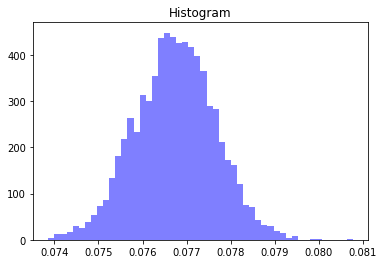

In [31]:
#label直方图
plt.hist(y_data,bins=50, normed=1, histtype='stepfilled', facecolor='b', alpha=0.5);
plt.title('Histogram');
plt.show();

In [57]:
#导入数据
data=data = pd.read_csv("E:/ELEC3D_for_Chen/126_train_data.csv")

In [101]:
#对于y与各特征量关系对比
s_data=data[0:300]#选定300个
y = s_data['label'].copy()
x1= s_data['Upper_quartile'].copy()
x2= s_data['Lower_Quantile'].copy()
x3= s_data['quartile_deviation'].copy()
x4= s_data['Median'].copy()
x5= s_data['average_value'].copy()
x6= s_data['standard_deviation'].copy()
x7= s_data['Dispersion_coefficient'].copy()
x8= s_data['skewness'].copy()
x9= s_data['kurtosis'].copy()
x10= s_data['mean_width'].copy()
x11= s_data['surface'].copy()
x12= s_data['volume'].copy()
order1=np.argsort(x1)
order2=np.argsort(x2)
order3=np.argsort(x3)
order4=np.argsort(x4)
order5=np.argsort(x5)
order6=np.argsort(x6)
order7=np.argsort(x7)
order8=np.argsort(x8)
order9=np.argsort(x9)
order10=np.argsort(x10)
order11=np.argsort(x11)
order12=np.argsort(x12)
#print(order1)
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
y6=[]
y7=[]
y8=[]
y9=[]
y10=[]
y11=[]
y12=[]
for i in range(0,300):
    y1.append(y[order1[i]])
    y2.append(y[order2[i]])
    y3.append(y[order3[i]])
    y4.append(y[order4[i]])
    y5.append(y[order5[i]])
    y6.append(y[order6[i]])
    y7.append(y[order7[i]])
    y8.append(y[order8[i]])
    y9.append(y[order9[i]])
    y10.append(y[order10[i]])
    y11.append(y[order11[i]])
    y12.append(y[order12[i]])

In [85]:
#直线方程函数
def f_1(x, A, B):
    return A*x + B

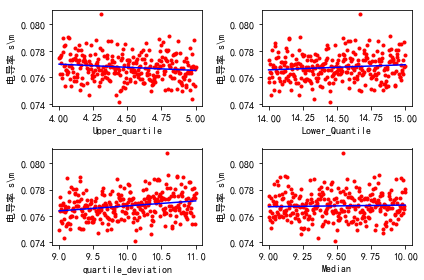

In [99]:
#观察各个特征对y的关系
plt.subplot(2, 2, 1)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.xlabel("Upper_quartile")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x1),max(x1),300)
plt.plot(x,y1,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y1)[0]
s_y1 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y1,'b')
plt.subplot(2, 2, 2)
plt.xlabel("Lower_Quantile")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x2),max(x2),300)
plt.plot(x,y2,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y2)[0]
s_y2 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y2,'b')
plt.subplot(2, 2, 3)
plt.xlabel("quartile_deviation")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x3),max(x3),300)
plt.plot(x,y3,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y3)[0]
s_y3 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y3,'b')
plt.subplot(2, 2, 4)
plt.xlabel("Median")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x4),max(x4),300)
plt.plot(x,y4,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y4)[0]
s_y4 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y4,'b')

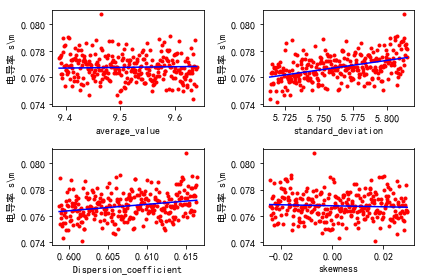

In [100]:
plt.subplot(2, 2, 1)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.xlabel("average_value")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x5),max(x5),300)
plt.plot(x,y1,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y5)[0]
s_y5 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y5,'b')
plt.subplot(2, 2, 2)
plt.xlabel("standard_deviation")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x6),max(x6),300)
plt.plot(x,y6,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y6)[0]
s_y6 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y6,'b')
plt.subplot(2, 2, 3)
plt.xlabel("Dispersion_coefficient")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x7),max(x7),300)
plt.plot(x,y7,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y7)[0]
s_y7 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y7,'b')
plt.subplot(2, 2, 4)
plt.xlabel("skewness")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x8),max(x8),300)
plt.plot(x,y8,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y8)[0]
s_y8 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y8,'b')

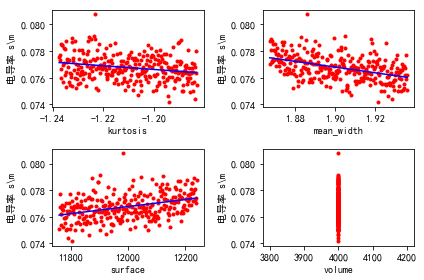

In [104]:
plt.subplot(2, 2, 1)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.xlabel("kurtosis")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x9),max(x9),300)
plt.plot(x,y9,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y9)[0]
s_y9 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y9,'b')
plt.subplot(2, 2, 2)
plt.xlabel("mean_width")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x10),max(x10),300)
plt.plot(x,y10,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y10)[0]
s_y10 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y10,'b')
plt.subplot(2, 2, 3)
plt.xlabel("surface")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x11),max(x11),300)
plt.plot(x,y11,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y11)[0]
s_y11 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y11,'b')
plt.subplot(2, 2, 4)
plt.xlabel("volume")
plt.ylabel("电导率 s\m")
x = np.linspace(min(x12),max(x12),300)
plt.plot(x,y12,'r.')
A1, B1 = optimize.curve_fit(f_1, x, y12)[0]
s_y12 = A1*x + B1
plt.tight_layout()
plt.plot(x, s_y12,'b')

In [105]:
data.describe()

,label,Upper_quartile,Lower_Quantile,quartile_deviation,Median,average_value,standard_deviation,Dispersion_coefficient,skewness,kurtosis,mean_width,surface,volume
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,0.076737,4.490933,14.483133,9.992200,9.497633,9.499558,5.765622,0.606945,0.000056,-1.206463,1.904413,12002.103200,4000.0
std,0.000909,0.285853,0.288750,0.358621,0.287102,0.037155,0.016623,0.002910,0.009200,0.007317,0.012582,76.385451,0.0
min,0.073862,4.000000,14.000000,9.000000,9.000000,9.351833,5.702801,0.597037,-0.035106,-1.237448,1.855861,11727.000000,4000.0
25%,0.076122,4.333333,14.333333,9.666667,9.333333,9.474583,5.754352,0.604985,-0.006008,-1.211327,1.896034,11950.000000,4000.0
50%,0.076749,4.333333,14.333333,10.000000,9.500000,9.499292,5.765266,0.606962,0.000209,-1.206422,1.904460,12001.000000,4000.0
75%,0.077341,4.666667,14.666667,10.333333,9.666667,9.524271,5.776948,0.608919,0.006268,-1.201613,1.912960,12053.000000,4000.0
max,0.080766,5.000000,15.000000,11.000000,10.000000,9.639667,5.820588,0.616347,0.037023,-1.177409,1.950902,12310.000000,4000.0


In [107]:
#查看
data.head()

,label,Upper_quartile,Lower_Quantile,quartile_deviation,Median,average_value,standard_deviation,Dispersion_coefficient,skewness,kurtosis,mean_width,surface,volume
0,0.077492,4.000000,14.333333,10.333333,9.000000,9.442250,5.793567,0.613579,0.006492,-1.216463,1.894537,12076.0,4000.0
1,0.078624,4.666667,14.666667,10.000000,9.666667,9.543250,5.773961,0.605031,-0.010034,-1.209104,1.913570,11949.0,4000.0
2,0.076346,4.666667,14.333333,9.666667,9.333333,9.497250,5.737328,0.604104,0.003605,-1.197246,1.907487,12005.0,4000.0
3,0.076277,4.666667,14.333333,9.666667,9.000000,9.455167,5.744798,0.607583,0.007971,-1.195101,1.892446,12064.0,4000.0
4,0.076807,4.333333,14.333333,10.000000,9.666667,9.488500,5.760529,0.607106,-0.008126,-1.204792,1.927092,11871.0,4000.0


In [209]:
#分割标签和特征项
#选取部分特征作为X
y = data['label'].copy()
X = data[['standard_deviation','Dispersion_coefficient','kurtosis','mean_width','surface']].copy()
#X = data[['standard_deviation','mean_width','surface']].copy()
#X = data[['Upper_quartile','Lower_Quantile','quartile_deviation','Median','average_value','standard_deviation',
#          'Dispersion_coefficient','skewness','kurtosis','mean_width','surface']].copy()

In [210]:
#分割训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [211]:
#定义rmse，mae，R_Squared
def compute_rmse(y1, y2):
    return np.mean((y1 - y2) ** 2) ** 0.5

In [212]:
#使用平均值计算误差
compute_rmse(np.mean(y_train),y_test)

0.0008994382650111456

In [213]:
#线性模型未进行归一化处理
LR =  LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

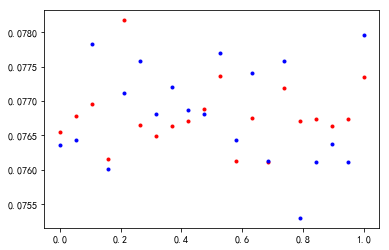

In [214]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,20)
plt.plot(x,LR.predict(X_test)[0:20],'r.',x,y_test[0:20],'b.')

In [215]:
compute_rmse(LR.predict(X_test), y_test)#未进行归一化处理

0.0007322359947813713

In [216]:
#归一化处理
s_X=(X- X.min()) / (X.max() - X.min())
s_X_train = (X_train- X.min()) / (X.max() - X.min())
s_X_test=(X_test- X.min()) / (X.max() - X.min())

In [217]:
#线性模型归一化处理
LR =  LinearRegression()
LR.fit(s_X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

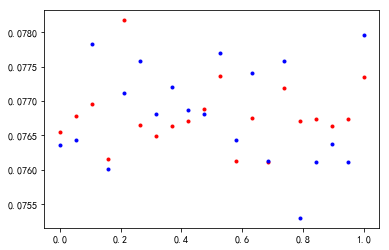

In [179]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,20)
plt.plot(x,LR.predict(s_X_test)[0:20],'r.',x,y_test[0:20],'b.')

In [218]:
compute_rmse(LR.predict(s_X_test), y_test)#归一化处理后

0.0007322359947813732